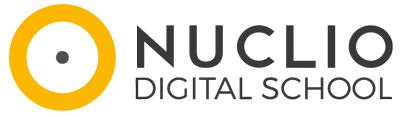


# **Modulo 4. Análisis de datos - Proyecto final**



# **Caso práctico**
***Análisis de mercado para la apertura de centros especializados de Halterofilia***

***Lift & Lead***, es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de ***Lift & Lead*** busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. **Fase 1**: Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. **Fase 2:** Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024


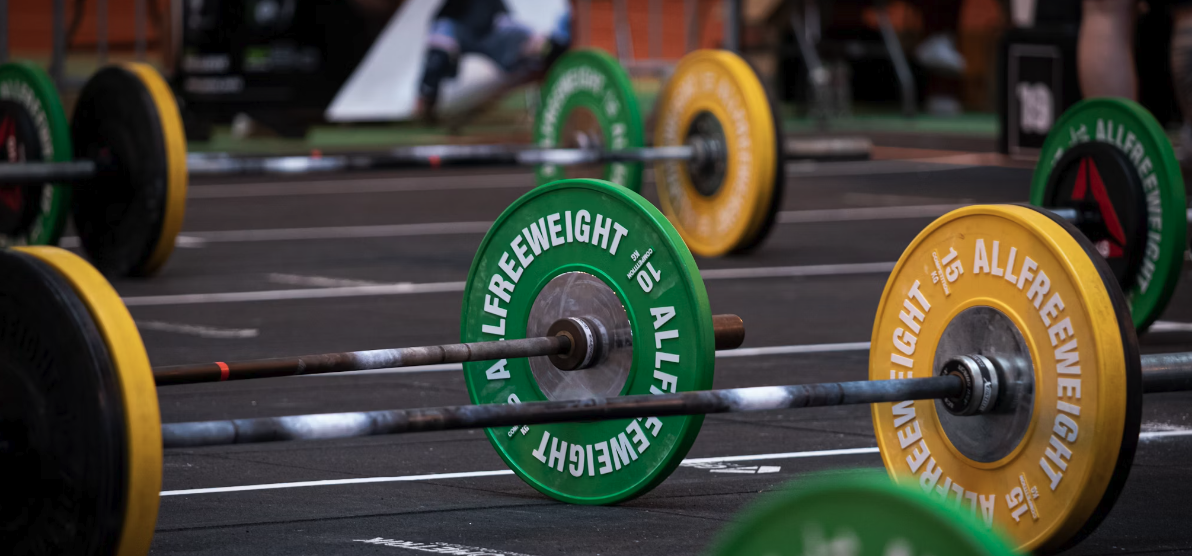

# **Parte 1.** Disponemos de la información

## Paso 1. Importar librerías

In [853]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

## Paso 2. Cargar datos

### Cargamos las rutas

In [854]:
path = (r"C:\Users\User\Documents\Data analyst\Modulos\M4\Proyecto final\1.Datos\\")
file1 = "Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv"
file2 = "Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv"

### Creamos los df

In [855]:
df_2019 = pd.read_csv(path + file1)
df_2021 = pd.read_csv(path + file2)

## Paso 3. Exploración inicial

### Exploramos el DataFrame con los datos de 2019

In [856]:
df_2019

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


In [857]:
df_2019.shape

(20, 6)

In [858]:
df_2019.head()

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino


In [859]:
df_2019.tail()

,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (10.04),Anastasiya Romanova Rusia 112 + 128 = 240,Emily Godley Reino Unido 93 + 123 = 216,Mădălina Molie Rumania 101 + 114 = 215,2019,Femenino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino
17,81 kg[n 2]​ (12.04),Nina Schroth Alemania 102 + 120 = 222,Anna Van Bellinghen Bélgica 103 + 118 = 221,Liana Guiurdzhian Armenia 97 + 120 = 217,2019,Femenino
18,87 kg (12.04),Xeniya Pasjina Rusia 110 + 132 = 242,Diana Mstiyeva Rusia 110 + 130 = 240,Sarah Fischer Austria 102 + 129 = 231,2019,Femenino
19,+87 kg (13.04),Tatiana Kashirina Rusia 146 + 185 = 331,Anastasiya Lysenko Ucrania 120 + 148 = 268,Emily Campbell Reino Unido 115 + 145 = 260,2019,Femenino


Tras ver el DF entero, los 5 primeros registros y los 5 últimos, vemos lo siguiente: 
1. La columna "Eventos" engloba el evento (los kg levantados) y la fecha del mismo
 
    --> Esto se debe separar en dos columnas "kg_evento" y "fecha_evento"

2. Las columnas "Oro", "Plata" y "Bronce" a partir de la segunda fila contienen 5 tipos de informaciones (nombre, país, primer levantamiento: Arrancada, segundo levantamiento: dos tiempos, el total olímpico)

3. La primera y la décima fila de las columnas "Oro", "Plata" y "Bronce", además de las informaciones que detallo en el punto 2, también contiene una leyenda en el str "[n 1]"
 --> Columnas a crear:
 - nombre_apellidos
 - pais
 - arrancada
 - dos_tiempos
 - total_olimpico
        
     --> Datos a borrar:
 - [n1]: se trata de una leyenda creada en Wikipedia para explicarnos a que corresponde cada número y la unidad de medida (kg)

In [860]:
display(df_2019.sample(n = 5))

,Eventos,Oro,Plata,Bronce,Año,Genero
12,55 kg (07.04),Joanna Łochowska Polonia 87 + 112 = 199,Svetlana Yershova Rusia 90 + 108 = 198,Kristina Novitskaya Rusia 85 + 105 = 190,2019,Femenino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino


In [861]:
df_2019.columns

Index(['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero'], dtype='object')

In [862]:
df_2019.dtypes

Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

In [863]:
df_2019.dtypes.value_counts()

object    5
int64     1
Name: count, dtype: int64

In [864]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  20 non-null     object
 1   Oro      20 non-null     object
 2   Plata    20 non-null     object
 3   Bronce   20 non-null     object
 4   Año      20 non-null     int64 
 5   Genero   20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB


Sabemos que tenemos 20 filas en nuestro DataFrame, así que podemos afirmar que no tenemos nulos en ninguna columna

In [865]:
df_2019.nunique()

Eventos    20
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64

Tras obtener esta información, podemos decir que las columnas: Eventos, Oro, Plata, Bronce no contienen duplicidades (aunque debemos comprobarlo igualmente cuando ya tengamos nuestras columnas separadas correctamente)

### Exploramos el DataFrame con los datos de 2020 que como ya sabemos son del 2021

In [866]:
df_2021

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino
5,89 kg (08.04),Karen Avaguian Armenia 175 + 200 = 375,Revaz Davitadze Georgia 171 + 203 = 374,Andranik Karapetian Armenia 170 + 195 = 365,2020,Masculino
6,96 kg (09.04),Anton Pliesnoi Georgia 180 + 213 = 393,Piotr Asayonak Bielorrusia 172 + 202 = 374,Hakob Mkrtchian Armenia 160 + 212 = 372,2020,Masculino
7,102 kg (10.04),Samvel Gasparian Armenia 176 +214 = 390,Arsen Martirosian Armenia 171 + 209 = 380,Dadaş Dadaşbəyli Azerbaiyán 177 + 202 = 379,2020,Masculino
8,109 kg (10.04),Dmytro Chumak Ucrania 181 + 226 = 407,Jristo Jristov Bulgaria 186 + 220 = 406,Timur Naniyev Rusia 184 + 217 = 401,2020,Masculino
9,+109 kg (11.04),Lasha Talajadze Georgia 222 + 263 = 485,Gor Minasian Armenia 216 + 248 = 464,Varazdat Lalayan Armenia 205 + 240 = 445,2020,Masculino


In [867]:
df_2021.shape

(20, 6)

In [868]:
df_2021.head()

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino


In [869]:
df_2021.tail()

,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2020,Femenino
16,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2020,Femenino
17,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,2020,Femenino
18,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,2020,Femenino
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino


In [870]:
df_2021.sample(n = 5)

,Eventos,Oro,Plata,Bronce,Año,Genero
10,45 kg (03.04),Nadezhda Nguen Bulgaria 72 + 83 = 155[n 1]​,Ivana Petrova Bulgaria 67 + 85 = 152[n 1]​,Melisa Güneş Turquía 68 + 83 = 151[n 1]​,2020,Femenino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino
5,89 kg (08.04),Karen Avaguian Armenia 175 + 200 = 375,Revaz Davitadze Georgia 171 + 203 = 374,Andranik Karapetian Armenia 170 + 195 = 365,2020,Masculino


In [871]:
df_2021.columns

Index(['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero'], dtype='object')

In [872]:
df_2021.dtypes

Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

In [873]:
df_2021.dtypes.value_counts()

object    5
int64     1
Name: count, dtype: int64

In [874]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  20 non-null     object
 1   Oro      20 non-null     object
 2   Plata    20 non-null     object
 3   Bronce   20 non-null     object
 4   Año      20 non-null     int64 
 5   Genero   20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB


In [875]:
df_2021.nunique()

Eventos    19
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64

In [876]:
df_2021.head()

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino


## Paso 4. Crear un único dataframe con los datos de 2019 y 2020

Antes de crear un único DF para los dos años, cambio el año 2020 por 2021

In [877]:
for x in df_2021['Año']:
    if x == 2020:
        df_2021['Año'] = 2021

In [878]:
df_2021['Año']

0     2021
1     2021
2     2021
3     2021
4     2021
5     2021
6     2021
7     2021
8     2021
9     2021
10    2021
11    2021
12    2021
13    2021
14    2021
15    2021
16    2021
17    2021
18    2021
19    2021
Name: Año, dtype: int64

In [879]:
df_2021.head()

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2021,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2021,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2021,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2021,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2021,Masculino


In [880]:
df_19_21 = pd.concat([df_2019, df_2021], ignore_index=True)

In [881]:
df_19_21['Año'].value_counts()

Año
2019    20
2021    20
Name: count, dtype: int64

In [882]:
df_19_21

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [883]:
df_19_21

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


In [884]:
# Seleccionamos las columnas del df_19_21 que queremos en el nuevo df
columnas = ['Eventos', 'Año', 'Genero']

# Creamos el DF con las columnas
df_aux = df_19_21[columnas].copy()


In [885]:
df_aux = pd.melt(df_19_21, id_vars=['Eventos', 'Año', 'Genero'], var_name="Medalla", value_name="Atleta")

In [886]:
df_aux.isnull().sum()

Eventos    0
Año        0
Genero     0
Medalla    0
Atleta     0
dtype: int64

In [887]:
df_aux

,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356
...,...,...,...,...,...
115,71 kg (07.04),2021,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218
116,76 kg (08.04),2021,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243
117,81 kg (09.04),2021,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227
118,87 kg (10.04),2021,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240


## Paso 6. Creación de columnas

- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [888]:
df_aux['Eventos']

0       55 kg (06.04)
1       61 kg (07.04)
2       67 kg (08.04)
3       73 kg (09.04)
4       81 kg (10.04)
            ...      
115     71 kg (07.04)
116     76 kg (08.04)
117     81 kg (09.04)
118     87 kg (10.04)
119    +87 kg (11.04)
Name: Eventos, Length: 120, dtype: object

Explicación del tratamiento de la columnas "df_aux['Eventos']": 
- Tras intentar tratar los datos con ``".str.split()"``, me he dado cuenta que no todas las filas tienen exactamente el mismo formato, algunas tienen un + delante del peso y eso hace que no se pueda separar correctamente y da error por el numero de columnas. Visto esto, me decido a realizar el tratamiento de datos con expresiones regulares. 
- He creado regex_eventos y la he aplicado a la columna de Eventos. 
- Esto ha dado buen resultado, pero no el óptimo, puesto que en las 3 columnas que hemos creado (Paso, Unidad y Fecha) nos aparecian 3 nulos.
Una vez he detectado esto con: ``df_aux.isnull().sum()``
- He pasado a identificar las filas con nulos: ``filas_nulas = df_aux[df_aux[['Peso', 'Unidad', 'Fecha']].isnull().any(axis=1)]``, y las he mostrado con ``print(filas_nulas)``
- Finalmente con un for loop he sacado los carácteres especiales para identificarlos: 
``for index, evento in df_aux.loc[df_aux[['Peso', 'Unidad', 'Fecha']].isnull().any(axis=1), 'Eventos'].items():
    print(f"Índice {index}: {repr(evento)}")``

In [889]:
# Habia algunas filas que tenian [N 2], así que lo borramos con la siguiente sentenci
df_aux['Eventos'] = df_aux['Eventos'].str.replace(r'\[.*?\]', '', regex=True)

# Creamos esta sentencia (con función lambda) para reemplazar los espacios "raros" en normales para que podamos realizar la separación en 3 columnas
df_aux['Eventos'] = df_aux['Eventos'].apply(lambda x: x.replace('\xa0', ' ').replace('\u200b', ' ') if isinstance(x, str) else x)

# Creo la expresión regular para la columna Eventos, así luego puedo extraer la información de la misma
regex_eventos = r'(?P<Peso>[+\d]+)\s*(?P<Unidad>\w+)\s*\((?P<Fecha>[\d.]+)\)'

# Aplico la expresión regular "regex_eventos" a la columna Eventos
df_aux[['Peso', 'Unidad', 'Fecha']] = df_aux['Eventos'].str.extract(regex_eventos)

In [890]:
df_aux

,Eventos,Año,Genero,Medalla,Atleta,Peso,Unidad,Fecha
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​,55,kg,06.04
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,61,kg,07.04
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,67,kg,08.04
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,73,kg,09.04
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,81,kg,10.04
...,...,...,...,...,...,...,...,...
115,71 kg (07.04),2021,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218,71,kg,07.04
116,76 kg (08.04),2021,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,76,kg,08.04
117,81 kg (09.04),2021,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227,81,kg,09.04
118,87 kg (10.04),2021,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240,87,kg,10.04


In [891]:
df_aux.isnull().sum()

Eventos    0
Año        0
Genero     0
Medalla    0
Atleta     0
Peso       0
Unidad     0
Fecha      0
dtype: int64

In [892]:
df_aux

,Eventos,Año,Genero,Medalla,Atleta,Peso,Unidad,Fecha
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​,55,kg,06.04
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,61,kg,07.04
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,67,kg,08.04
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,73,kg,09.04
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,81,kg,10.04
...,...,...,...,...,...,...,...,...
115,71 kg (07.04),2021,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218,71,kg,07.04
116,76 kg (08.04),2021,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,76,kg,08.04
117,81 kg (09.04),2021,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227,81,kg,09.04
118,87 kg (10.04),2021,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240,87,kg,10.04


In [ ]:
# Limpiar la columna del carácter especial \u200b:
df_aux["Atleta"] = df_aux["Atleta"].str.replace(r"\u200b", "", regex=True).str.strip()

# Eliminar cualquier texto entre corchetes
df_aux['Atleta'] = df_aux['Atleta'].str.replace(r'\[.*?\]', '', regex=True)

# Eliminar caracteres no ASCII
df_aux['Atleta'] = df_aux['Atleta'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

# Convertir la primera letra de cada palabra a mayúsculas
df_aux['Atleta'] = df_aux['Atleta'].str.title()

# Reemplazar "Reino Unido" en toda la columna "Atleta" para asegurarnos que no se separe
df_aux['Atleta'] = df_aux['Atleta'].str.replace(r'\bReino\s+Unido\b', 'ReinoUnido', regex=True)

# Ahora defino la expresión regular
regex_atleta = r'(?P<Nombre>[A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+(?:[\s-][A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+)*)\s+(?P<Apellido>[A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+(?:[\s-][A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+)*)\s+(?P<Pais>ReinoUnido|Estados\s+Unidos|[A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+(?:[\s-][A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+)*)\s+(?P<Arrancada>\d+)\s*(?:\+\s*(?P<Dos_tiempos>\d+))?\s*=\s*(?P<Total>\d+)'


In [ ]:
# Aplico la extracción con la expresión regular
df_aux[['Nombre', 'Apellido', 'Pais', 'Arrancada', 'Dos_tiempos', 'Total']] = df_aux['Atleta'].str.extract(regex_atleta)

# Convierto los valores numéricos a enteros
df_aux[['Arrancada', 'Dos_tiempos', 'Total']] = df_aux[['Arrancada', 'Dos_tiempos', 'Total']].apply(pd.to_numeric, errors='coerce').astype('Int64')


In [895]:
df_aux.isnull().sum()

Eventos        0
Año            0
Genero         0
Medalla        0
Atleta         0
Peso           0
Unidad         0
Fecha          0
Nombre         0
Apellido       0
Pais           0
Arrancada      0
Dos_tiempos    0
Total          0
dtype: int64

In [896]:
# Hago .value_counts() para ver los nombres de los países (con otras sentencias o no se ven enteros o es más engorrosos)
df_aux['Pais'].value_counts()

Pais
Rusia          20
Armenia        14
Bulgaria       10
Bielorrusia     9
Georgia         9
Turqua          9
Rumania         9
Ucrania         8
Italia          6
ReinoUnido      6
Letonia         3
Francia         3
Alemania        2
Azerbaiyn       2
Albania         2
Blgica          2
Moldavia        2
Polonia         1
Espaa           1
Suecia          1
Austria         1
Name: count, dtype: int64

Tras el value_counts(), me doy cuenta que hay 3 países que aparecen mal escritos después de tratar los datos para separarlos.
Los países mal escritos son: España, Reino Unido y Turquía.

In [897]:
# A través de la función lambda cambio Espaa por España
df_aux['Pais'] = df_aux['Pais'].apply(lambda x: "España" if x == "Espaa" else x)

In [898]:
# Modifico Turquía (antes era Turqua) con .replace()
df_aux['Pais'] = df_aux['Pais'].replace('Turqua', 'Turquía')

# Modifico Bélgica (antes era Blgica) con .replace()
df_aux['Pais'] = df_aux['Pais'].replace('Blgica', 'Bélgica')

In [899]:
# De nuevo con la función lambda modifico 'Reino Unido', antes: 'ReinoUnido'
df_aux['Pais'] = df_aux['Pais'].apply(lambda x: 'Reino Unido' if x == 'ReinoUnido' else x)

In [900]:
df_aux['Pais'].value_counts()

Pais
Rusia          20
Armenia        14
Bulgaria       10
Bielorrusia     9
Georgia         9
Turquía         9
Rumania         9
Ucrania         8
Italia          6
Reino Unido     6
Letonia         3
Francia         3
Alemania        2
Azerbaiyn       2
Albania         2
Bélgica         2
Moldavia        2
Polonia         1
España          1
Suecia          1
Austria         1
Name: count, dtype: int64

In [901]:
df_aux.head()

,Eventos,Año,Genero,Medalla,Atleta,Peso,Unidad,Fecha,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,55,kg,06.04,Mirco,Scarantino,Italia,116,145,261
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,61,kg,07.04,Henadz,Laptseu,Bielorrusia,133,153,286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,67,kg,08.04,Bernardin,Matam,Francia,137,175,312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,73,kg,09.04,Bozhidar,Andreev,Bulgaria,153,192,345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,81,kg,10.04,Antonino,Pizzolato,Italia,155,201,356


In [902]:
df_aux

,Eventos,Año,Genero,Medalla,Atleta,Peso,Unidad,Fecha,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,55,kg,06.04,Mirco,Scarantino,Italia,116,145,261
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,61,kg,07.04,Henadz,Laptseu,Bielorrusia,133,153,286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,67,kg,08.04,Bernardin,Matam,Francia,137,175,312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,73,kg,09.04,Bozhidar,Andreev,Bulgaria,153,192,345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,81,kg,10.04,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,71 kg (07.04),2021,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218,71,kg,07.04,Raluca,Olaru,Rumania,98,120,218
116,76 kg (08.04),2021,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,76,kg,08.04,Anastasiya,Romanova,Rusia,111,132,243
117,81 kg (09.04),2021,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227,81,kg,09.04,Liana,Guiurdzhian,Armenia,98,129,227
118,87 kg (10.04),2021,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240,87,kg,10.04,Daria,Riazanova,Rusia,105,135,240


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [903]:
df_aux["Fecha_completa"] = pd.to_datetime(df_aux["Año"].astype(str) + "-" + df_aux["Fecha"], format="%Y-%d.%m")

In [904]:
df_final_19_21 = df_aux[['Genero', 'Peso', 'Fecha_completa', 'Medalla','Nombre', 'Apellido', 'Pais', 'Arrancada', 'Dos_tiempos', 'Total']]

In [905]:
df_final_19_21.rename(columns={'Peso': 'Categoria'}, inplace=True)

In [906]:
df_final_19_21.head()

,Genero,Categoria,Fecha_completa,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
0,Masculino,55,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356


In [907]:
df_final_19_21.columns = ['Fecha' if col == 'Fecha_completa' else col for col in df_final_19_21.columns]


In [908]:
df_final_19_21.head()

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
0,Masculino,55,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356


## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [909]:
df_final_19_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Genero       120 non-null    object        
 1   Categoria    120 non-null    object        
 2   Fecha        120 non-null    datetime64[ns]
 3   Medalla      120 non-null    object        
 4   Nombre       120 non-null    object        
 5   Apellido     120 non-null    object        
 6   Pais         120 non-null    object        
 7   Arrancada    120 non-null    Int64         
 8   Dos_tiempos  120 non-null    Int64         
 9   Total        120 non-null    Int64         
dtypes: Int64(3), datetime64[ns](1), object(6)
memory usage: 9.9+ KB


- **Object**: 'Genero', 'Nombre', 'Apellido', 'Pais' --> no hace falta hacer nada
- **Category**: 'Categoria', 'Medalla', ``Se debe modificar`` --> Ahora estan como **object**
- **datetime64[ns]**: 'Fecha', ``Se debe modificar`` --> Ahora estan como **int64**
- **int64**: 'Arrancada', 'Dos_tiempos', 'Total' --> No hace falta hacer nada

In [910]:
# Modifico el tipo de las columnas 'Categoria' y 'Medalla' de tipo object a category
df_final_19_21[['Categoria', 'Medalla']] = df_final_19_21[['Categoria', 'Medalla']].astype('category')

In [911]:
# Modifico el tipo de la columna 'Fecha' de int64 a datetime64[ns]
df_final_19_21['Fecha'] = pd.to_datetime(df_final_19_21['Fecha'], format='%Y')

### DESPUÉS

In [912]:
# compruebo los tipos de datos:
df_final_19_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Genero       120 non-null    object        
 1   Categoria    120 non-null    category      
 2   Fecha        120 non-null    datetime64[ns]
 3   Medalla      120 non-null    category      
 4   Nombre       120 non-null    object        
 5   Apellido     120 non-null    object        
 6   Pais         120 non-null    object        
 7   Arrancada    120 non-null    Int64         
 8   Dos_tiempos  120 non-null    Int64         
 9   Total        120 non-null    Int64         
dtypes: Int64(3), category(2), datetime64[ns](1), object(4)
memory usage: 9.0+ KB


## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [913]:
df_final_19_21

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
0,Masculino,55,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,Femenino,71,2021-04-07,Bronce,Raluca,Olaru,Rumania,98,120,218
116,Femenino,76,2021-04-08,Bronce,Anastasiya,Romanova,Rusia,111,132,243
117,Femenino,81,2021-04-09,Bronce,Liana,Guiurdzhian,Armenia,98,129,227
118,Femenino,87,2021-04-10,Bronce,Daria,Riazanova,Rusia,105,135,240


In [914]:
# Definir el orden correcto de medallas
orden_medallas = ['Oro', 'Plata', 'Bronce']
df_final_19_21['Medalla'] = pd.Categorical(df_final_19_21['Medalla'], categories=orden_medallas, ordered=True)

# Convertir 'Categoria' en un orden personalizado
df_final_19_21['Categoria'] = df_final_19_21['Categoria'].astype(str)  # Asegurar que es texto

# Crear un orden numérico, tratando '+87' como 88 para que quede en su lugar
df_final_19_21['Orden_Categoria'] = df_final_19_21['Categoria'].str.replace('+', '').astype(int)
df_final_19_21.loc[df_final_19_21['Categoria'].str.startswith('+'), 'Orden_Categoria'] += 1  # Ajustamos +87 a 88

# Ordenar el DataFrame por 'Genero', 'Orden_Categoria', 'Fecha', 'Medalla'
df_final_19_21 = df_final_19_21.sort_values(by=['Genero', 'Orden_Categoria', 'Fecha', 'Medalla'])

# Asegurarse de que las medallas estén en el orden correcto para cada categoria y fecha
df_final_19_21['Medalla'] = df_final_19_21.groupby(['Categoria', 'Fecha'])['Medalla'].transform(lambda x: x)

# Eliminar columna auxiliar
df_final_19_21.drop(columns=['Orden_Categoria'], inplace=True)


In [915]:
df_final_19_21.head(20)

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
10,Femenino,45,2019-04-06,Oro,Aziye,Erdoan,Turquía,75,88,163
50,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
90,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
30,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
70,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
110,Femenino,45,2021-04-03,Bronce,Melisa,Gne,Turquía,68,83,151
11,Femenino,49,2019-04-06,Oro,Elena,Andrie,Rumania,87,103,190
51,Femenino,49,2019-04-06,Plata,Kristina,Sobol,Rusia,85,95,180
91,Femenino,49,2019-04-06,Bronce,Giorgia,Russo,Italia,75,103,178
31,Femenino,49,2021-04-03,Oro,Monica,Csengeri,Rumania,86,103,189


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [916]:
df_final_19_21

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
10,Femenino,45,2019-04-06,Oro,Aziye,Erdoan,Turquía,75,88,163
50,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
90,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
30,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
70,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
...,...,...,...,...,...,...,...,...,...,...
49,Masculino,+109,2019-04-13,Plata,Irakli,Turmanidze,Georgia,206,241,447
89,Masculino,+109,2019-04-13,Bronce,Ruben,Alexanian,Armenia,195,245,440
29,Masculino,+109,2021-04-11,Oro,Lasha,Talajadze,Georgia,222,263,485
69,Masculino,+109,2021-04-11,Plata,Gor,Minasian,Armenia,216,248,464


In [917]:
def exploracion_inicial(df_final_19_21, tipo = None):
    # print("Iniciando la exploración...")  # Esto ayudará a confirmar si la función se ejecuta.
    if tipo == 'version_lite':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df_final_19_21.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df_final_19_21.head(2))
        print('\n########################################################################################')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df_final_19_21.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df_final_19_21.head(5))
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df_final_19_21.tail(5))
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df_final_19_21.sample(n = 5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df_final_19_21.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("¿Cuál es el tipo de datos de cada columna?")
        print(df_final_19_21.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df_final_19_21.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df_final_19_21.info())
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df_final_19_21.nunique())
        print('\n########################################################################################')

        def fillna_custom(df):
            for col in df.columns:
                if df[col].dtype == 'object':  # Para columnas de tipo texto
                    df[col] = df[col].fillna('')
                elif df[col].dtype == 'category':  # Para columnas categóricas
                    df[col] = df[col].cat.add_categories(['']).fillna('')
                else:  # Para columnas numéricas
                    df[col] = df[col].fillna(0)
            return df

        df_final_19_21 = fillna_custom(df_final_19_21)  # Rellenamos los valores nulos

        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df_final_19_21.describe(include='all'))
        print('\n########################################################################################')

        print("¿Hay valores nulos en el conjunto de datos?")
        print(df_final_19_21.isnull().sum().sort_values(ascending=False))
        print('\n########################################################################################')

        print("¿Cuál es el porcentaje de valores nulos en cada columna?")
        print(round((df_final_19_21.isnull().sum()/len(df_final_19_21)*100), 2).sort_values(ascending=False))
        print('\n########################################################################################')


In [918]:
exploracion_inicial(df_final_19_21, tipo = None)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 10 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
10,Femenino,45,2019-04-06,Oro,Aziye,Erdoan,Turquía,75,88,163
50,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
90,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
30,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
70,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
49,Masculino,+109,2019-04-13,Plata,Irakli,Turmanidze,Georgia,206,241,447
89,Masculino,+109,2019-04-13,Bronce,Ruben,Alexanian,Armenia,195,245,440
29,Masculino,+109,2021-04-11,Oro,Lasha,Talajadze,Georgia,222,263,485
69,Masculino,+109,2021-04-11,Plata,Gor,Minasian,Armenia,216,248,464
109,Masculino,+109,2021-04-11,Bronce,Varazdat,Lalayan,Armenia,205,240,445



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
56,Femenino,76,2019-04-11,Plata,Lidia,Valentn,España,108,133,241
54,Femenino,64,2019-04-09,Plata,Irina,Lepa,Rumania,102,127,229
108,Masculino,109,2021-04-10,Bronce,Timur,Naniyev,Rusia,184,217,401
1,Masculino,61,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
89,Masculino,+109,2019-04-13,Bronce,Ruben,Alexanian,Armenia,195,245,440



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Genero
	 - Categoria
	 - Fecha
	 - Medalla
	 - Nombre
	 - Apellido
	 - Pais
	 - Arrancada
	 - Dos_tiempos
	 - Total

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Genero                 object
Categoria              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
Pais                   object
Arrancada               Int64
Dos_tiempos             Int64
Total                   Int64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            5
Int64             3
datetime64[ns]    1
category          1
Name: count, dtype: int64

#####################################################

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
count,120,120,120,120,120,120,120,120.0,120.0,120.0
unique,2,18,NaN,3,85,97,21,<NA>,<NA>,<NA>
top,Femenino,55,NaN,Oro,Anastasiya,Asayonak,Rusia,<NA>,<NA>,<NA>
freq,60,12,NaN,40,5,3,20,<NA>,<NA>,<NA>
mean,NaN,NaN,2020-04-07 21:36:00,NaN,NaN,NaN,NaN,129.6,157.391667,286.991667
min,NaN,NaN,2019-04-06 00:00:00,NaN,NaN,NaN,NaN,67.0,81.0,150.0
25%,NaN,NaN,2019-04-10 00:00:00,NaN,NaN,NaN,NaN,99.5,122.0,221.75
50%,NaN,NaN,2020-04-07 12:00:00,NaN,NaN,NaN,NaN,114.5,145.0,257.0
75%,NaN,NaN,2021-04-07 00:00:00,NaN,NaN,NaN,NaN,163.25,200.0,366.0
max,NaN,NaN,2021-04-11 00:00:00,NaN,NaN,NaN,NaN,222.0,263.0,485.0



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Genero         0
Categoria      0
Fecha          0
Medalla        0
Nombre         0
Apellido       0
Pais           0
Arrancada      0
Dos_tiempos    0
Total          0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Genero         0.0
Categoria      0.0
Fecha          0.0
Medalla        0.0
Nombre         0.0
Apellido       0.0
Pais           0.0
Arrancada      0.0
Dos_tiempos    0.0
Total          0.0
dtype: float64

########################################################################################


## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [919]:
df_final_19_21

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
10,Femenino,45,2019-04-06,Oro,Aziye,Erdoan,Turquía,75,88,163
50,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
90,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
30,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
70,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
...,...,...,...,...,...,...,...,...,...,...
49,Masculino,+109,2019-04-13,Plata,Irakli,Turmanidze,Georgia,206,241,447
89,Masculino,+109,2019-04-13,Bronce,Ruben,Alexanian,Armenia,195,245,440
29,Masculino,+109,2021-04-11,Oro,Lasha,Talajadze,Georgia,222,263,485
69,Masculino,+109,2021-04-11,Plata,Gor,Minasian,Armenia,216,248,464


In [920]:
df_final_19_21['Medalla'].value_counts()

Medalla
Oro       40
Plata     40
Bronce    40
           0
Name: count, dtype: int64

In [921]:
medallas_por_pais = df_final_19_21.groupby(['Pais', 'Medalla']).size().reset_index(name='Cantidad')

# Filtrar filas donde 'Medalla' está vacía
medallas_por_pais['Medalla'] = medallas_por_pais['Medalla'].replace("", np.nan)
medallas_por_pais = medallas_por_pais.dropna(subset=['Medalla'])

# Pivot para convertir las medallas en columnas
medallas_pivot = medallas_por_pais.pivot(index='Pais', columns='Medalla', values='Cantidad').fillna(0)

# Eliminar la posible columna sin nombre
medallas_pivot.columns.name = None  # Elimina el nombre de las columnas

# Agregar la columna 'Total'
medallas_pivot['Total'] = medallas_pivot.sum(axis=1)

# Reiniciar el índice para devolver 'Pais' como columna normal
medallas_pivot = medallas_pivot.reset_index()

In [922]:
medallas_pivot

,Pais,Oro,Plata,Bronce,Total
0,Albania,0,1,1,2
1,Alemania,1,1,0,2
2,Armenia,4,3,7,14
3,Austria,0,0,1,1
4,Azerbaiyn,1,0,1,2
5,Bielorrusia,3,3,3,9
6,Bulgaria,4,5,1,10
7,Bélgica,0,1,1,2
8,España,0,1,0,1
9,Francia,1,1,1,3


In [923]:
def graficar_proporciones(medallas_pivot, variable_categorica_1, variable_categorica_2):
    # Convertir las columnas de medallas a enteros
    medallas_pivot.iloc[:, 1:] = medallas_pivot.iloc[:, 1:].astype(int)

    # Graficar con plotly
    fig = px.histogram(
        medallas_pivot,
        x="Pais",
        y=["Oro", "Plata", "Bronce"],
        title="Medallas conseguidas por país entre 2019-2021",
        labels={variable_categorica_1: "Medalla", variable_categorica_2: f"País: {variable_categorica_2}"},
        text_auto=True,
        barmode="stack"
    )

    # Ajustes de diseño
    fig.update_layout(
        yaxis_title="Cantidad de Medallas",
        legend_title=variable_categorica_2,
        bargap=0.2,
        plot_bgcolor="rgba(255, 255, 255, 1)",
        xaxis={"showgrid": True, "gridcolor": "lightgrey"},
        yaxis={"showgrid": True, "gridcolor": "lightgrey"}
    )

    fig.show()


In [924]:
# Variables categóricas
variable_categorica_1 = "Medalla"
variable_categorica_2 = "País"

# Llamar a la función con el DataFrame corregido
graficar_proporciones(medallas_pivot, variable_categorica_1, variable_categorica_2)

### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [925]:
df_final_19_21

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
10,Femenino,45,2019-04-06,Oro,Aziye,Erdoan,Turquía,75,88,163
50,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
90,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
30,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
70,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
...,...,...,...,...,...,...,...,...,...,...
49,Masculino,+109,2019-04-13,Plata,Irakli,Turmanidze,Georgia,206,241,447
89,Masculino,+109,2019-04-13,Bronce,Ruben,Alexanian,Armenia,195,245,440
29,Masculino,+109,2021-04-11,Oro,Lasha,Talajadze,Georgia,222,263,485
69,Masculino,+109,2021-04-11,Plata,Gor,Minasian,Armenia,216,248,464


In [926]:
# Contar medallas por país y género
medallas_por_pais = df_final_19_21.groupby(["Pais", "Genero"])["Medalla"].count().unstack(fill_value=0)

# Calcular la diferencia absoluta entre medallas femeninas y masculinas
medallas_por_pais["Diferencia"] = abs(medallas_por_pais.get("Femenino", 0) - medallas_por_pais.get("Masculino", 0))

# Encontrar el país con la menor diferencia
pais_mas_equilibrado = medallas_por_pais["Diferencia"].idxmin()
diferencia_minima = medallas_por_pais["Diferencia"].min()

In [927]:
medallas_por_pais

Genero,Femenino,Masculino,Diferencia
Pais,,,
Albania,0,2,2
Alemania,1,1,0
Armenia,2,12,10
Austria,1,0,1
Azerbaiyn,1,1,0
Bielorrusia,2,7,5
Bulgaria,3,7,4
Bélgica,2,0,2
España,1,0,1


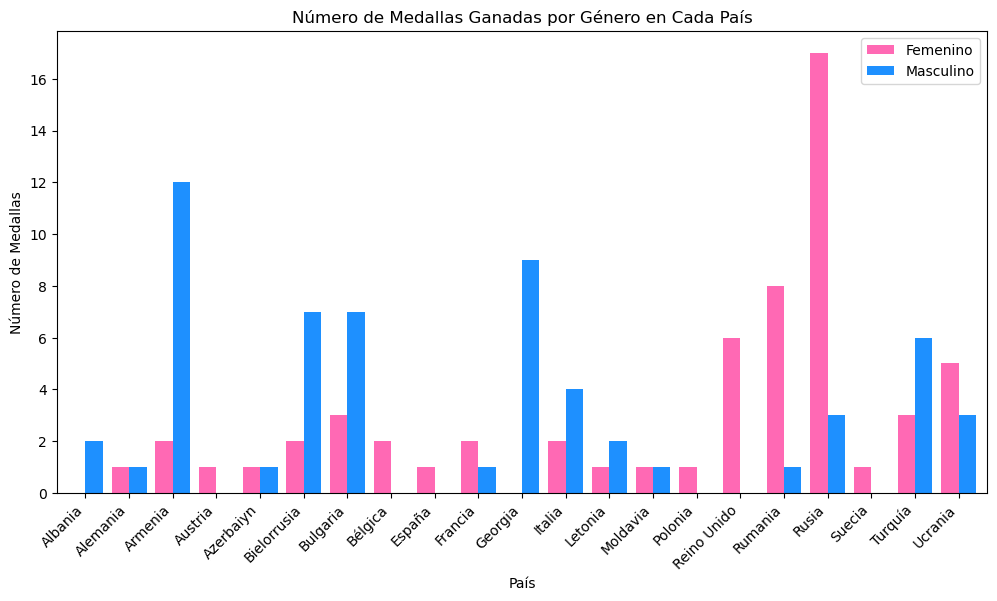

In [928]:
# Graficar barras separadas para cada género
fig, ax = plt.subplots(figsize=(12, 6))
medallas_por_pais[["Femenino", "Masculino"]].plot(
    kind="bar", ax=ax, color=["#FF69B4", "#1E90FF"], width=0.8
)

# Etiquetas y título
plt.ylabel("Número de Medallas")
plt.xlabel("País")
plt.title("Número de Medallas Ganadas por Género en Cada País")
plt.legend(["Femenino", "Masculino"])
plt.xticks(rotation=45, ha="right")

# Mostrar gráfico
plt.show()


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [929]:
# Filtramos los datos por género
df_femenino = df_final_19_21[df_final_19_21['Genero'] == 'Femenino']
df_masculino = df_final_19_21[df_final_19_21['Genero'] == 'Masculino']

# Calculamos el promedio de puntos totales por país y género
promedio_femenino = df_femenino.groupby('Pais')['Total'].mean()
promedio_masculino = df_masculino.groupby('Pais')['Total'].mean()

# Unimos los dos promedios por país
promedios = pd.concat([promedio_femenino, promedio_masculino], axis=1)
promedios.columns = ['Promedio_Femenino', 'Promedio_Masculino']

# Calculamos la diferencia absoluta entre los promedios
promedios['Diferencia'] = abs(promedios['Promedio_Femenino'] - promedios['Promedio_Masculino'])

# Encontramos el país con la menor diferencia
pais_menor_diferencia = promedios['Diferencia'].idxmin()

In [930]:
# Filtramos los datos por género
df_femenino = df_final_19_21[df_final_19_21['Genero'] == 'Femenino']
df_masculino = df_final_19_21[df_final_19_21['Genero'] == 'Masculino']

# Calculamos el promedio de puntos totales por país y género
promedio_femenino = df_femenino.groupby('Pais')['Total'].mean()
promedio_masculino = df_masculino.groupby('Pais')['Total'].mean()

# Unimos los dos promedios por país
promedios = pd.concat([promedio_femenino, promedio_masculino], axis=1)
promedios.columns = ['Promedio_Femenino', 'Promedio_Masculino']

# Calculamos la diferencia absoluta entre los promedios
promedios['Diferencia'] = abs(promedios['Promedio_Femenino'] - promedios['Promedio_Masculino'])

# Ahora tienes un DataFrame con los promedios y la diferencia por país
promedios


,Promedio_Femenino,Promedio_Masculino,Diferencia
Pais,,,
Alemania,222.0,311.0,89.0
Armenia,222.0,397.166667,175.166667
Austria,231.0,<NA>,<NA>
Azerbaiyn,211.0,379.0,168.0
Bielorrusia,196.0,362.428571,166.428571
Bulgaria,155.0,320.714286,165.714286
Bélgica,209.0,<NA>,<NA>
España,241.0,<NA>,<NA>
Francia,220.5,312.0,91.5


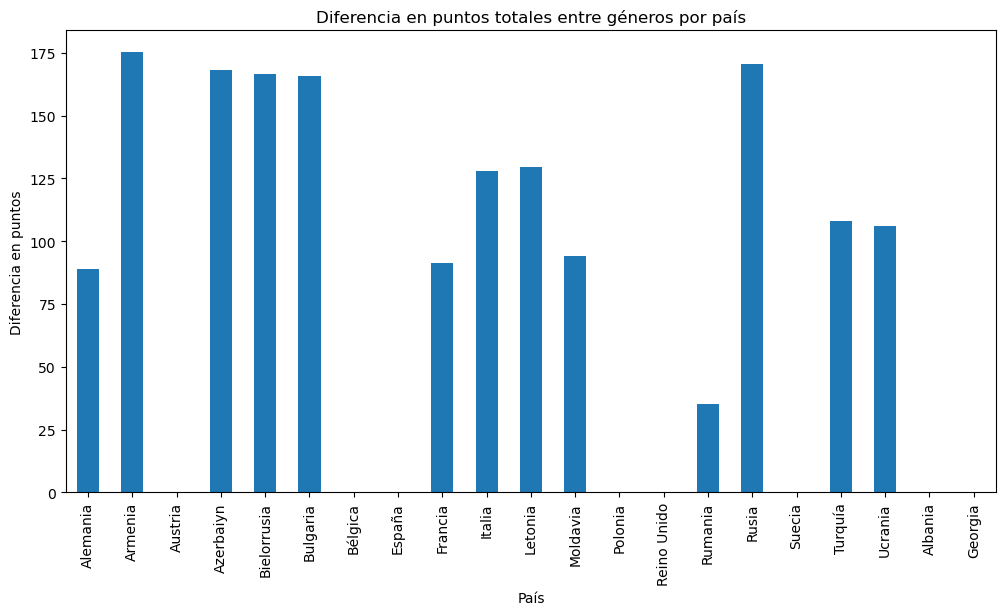

In [931]:
promedios['Diferencia'].plot(kind='bar', figsize=(12, 6))
plt.title('Diferencia en puntos totales entre géneros por país')
plt.ylabel('Diferencia en puntos')
plt.xlabel('País')
plt.xticks(rotation=90)
plt.show()

## **Preguntas propias**

### ¿Qué países tienen el mayor número de atletas en el podio?

In [932]:
medallas_por_pais = df_final_19_21.groupby("Pais")["Nombre"].count().reset_index()

In [933]:
medallas_por_pais

,Pais,Nombre
0,Albania,2
1,Alemania,2
2,Armenia,14
3,Austria,1
4,Azerbaiyn,2
5,Bielorrusia,9
6,Bulgaria,10
7,Bélgica,2
8,España,1
9,Francia,3


In [934]:
medallas_por_pais.columns = ["Pais", "Total_Medallas"]

In [935]:
medallas_por_pais.head(0)

,Pais,Total_Medallas


In [936]:
medallas_por_pais = medallas_por_pais.sort_values(by="Total_Medallas", ascending=False)

In [937]:
medallas_por_pais.head(5)

,Pais,Total_Medallas
17,Rusia,20
2,Armenia,14
6,Bulgaria,10
10,Georgia,9
16,Rumania,9


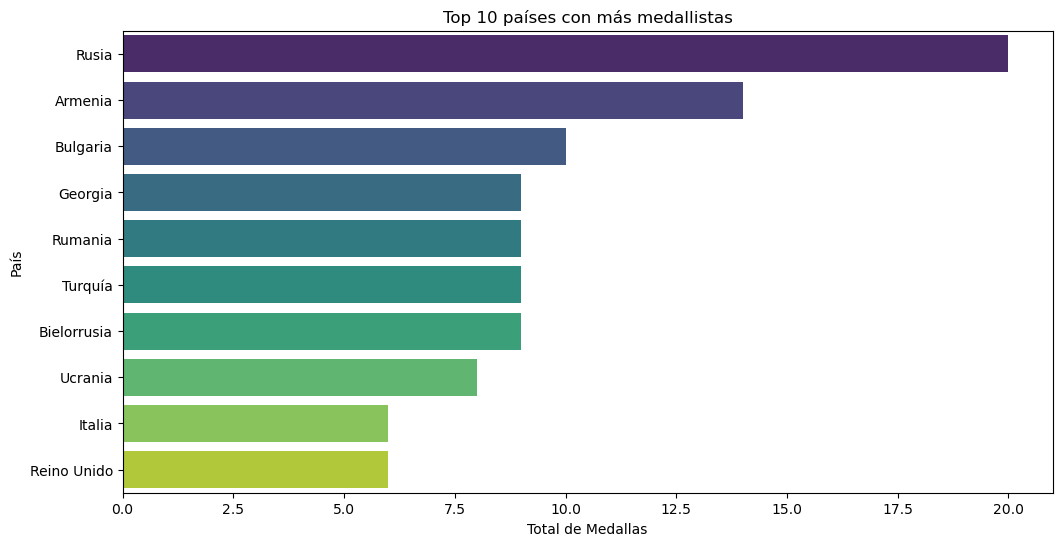

In [938]:
plt.figure(figsize=(12, 6))
sns.barplot(data=medallas_por_pais.head(10), x="Total_Medallas", y="Pais", palette="viridis")
plt.xlabel("Total de Medallas")
plt.ylabel("País")
plt.title("Top 10 países con más medallistas")
plt.show()

### ¿Cómo ha evolucionado el rendimiento de los países entre 2019 y 2021? (teniendo en cuenta que el año 2020 no se hizo)

In [939]:
df_final_19_21["Año"] = df_final_19_21["Fecha"].dt.year

In [940]:
medallas_por_pais_año = df_final_19_21.groupby(["Pais", "Año"])["Nombre"].count().unstack().fillna(0)

In [941]:
medallas_por_pais_año.head()

Año,2019,2021
Pais,,
Albania,1.0,1.0
Alemania,2.0,0.0
Armenia,6.0,8.0
Austria,1.0,0.0
Azerbaiyn,0.0,2.0


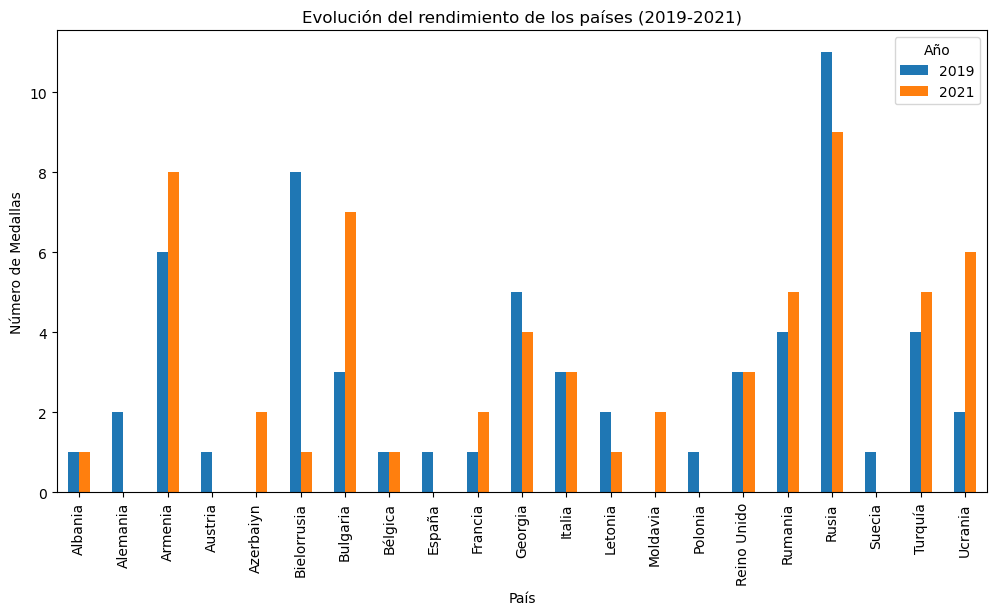

In [942]:
medallas_por_pais_año.plot(kind="bar", figsize=(12, 6))
plt.xlabel("País")
plt.ylabel("Número de Medallas")
plt.title("Evolución del rendimiento de los países (2019-2021)")
plt.xticks(rotation=90)
plt.legend(title="Año")
plt.show()

### ¿Cuáles son las categorías de peso más competitivas?

In [943]:
df_final_19_21["Diferencia"] = df_final_19_21.groupby("Categoria")["Total"].transform(lambda x: x.max() - x.min())

In [944]:
df_final_19_21["Diferencia"]

10     13
50     13
90     13
30     13
70     13
       ..
49     45
89     45
29     45
69     45
109    45
Name: Diferencia, Length: 120, dtype: int64

In [945]:
competitividad_categoria = df_final_19_21.groupby("Categoria")["Diferencia"].mean().reset_index().sort_values(by="Diferencia")

In [946]:
competitividad_categoria.head()

,Categoria,Diferencia
12,73,10.0
7,59,11.0
5,49,12.0
4,45,13.0
8,61,14.0


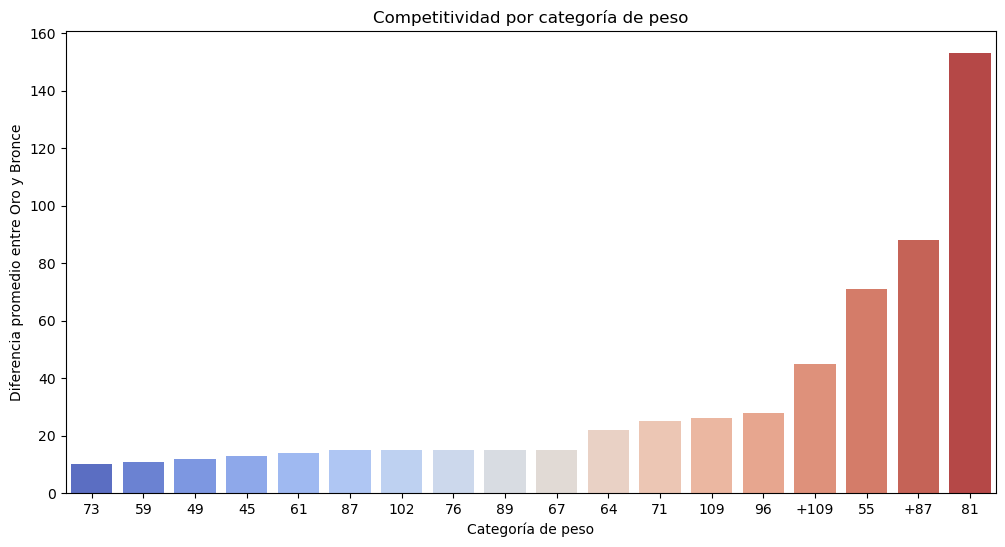

In [947]:
plt.figure(figsize=(12, 6))
sns.barplot(data=competitividad_categoria, x="Categoria", y="Diferencia", palette="coolwarm")
plt.xlabel("Categoría de peso")
plt.ylabel("Diferencia promedio entre Oro y Bronce")
plt.title("Competitividad por categoría de peso")
plt.xticks()
plt.show()

### ¿Existen países que destaquen en una modalidad específica (arrancada vs. dos tiempos)?

In [948]:
rendimiento_pais = df_final_19_21.groupby("Pais")[["Arrancada", "Dos_tiempos"]].mean().reset_index()

In [949]:
rendimiento_pais.head()

,Pais,Arrancada,Dos_tiempos
0,Albania,154.0,183.5
1,Alemania,124.0,142.5
2,Armenia,168.0,204.142857
3,Austria,102.0,129.0
4,Azerbaiyn,136.0,159.0


In [950]:
rendimiento_pais["Diferencia"] = abs(rendimiento_pais["Arrancada"] - rendimiento_pais["Dos_tiempos"])

In [951]:
rendimiento_pais["Diferencia"].head()

0         29.5
1         18.5
2    36.142857
3         27.0
4         23.0
Name: Diferencia, dtype: Float64

In [952]:
rendimiento_pais = rendimiento_pais.sort_values(by="Diferencia", ascending=False)

In [953]:
rendimiento_pais.head()

,Pais,Arrancada,Dos_tiempos,Diferencia
2,Armenia,168.0,204.142857,36.142857
10,Georgia,179.333333,212.0,32.666667
11,Italia,125.833333,157.833333,32.0
18,Suecia,101.0,132.0,31.0
15,Reino Unido,104.166667,134.666667,30.5


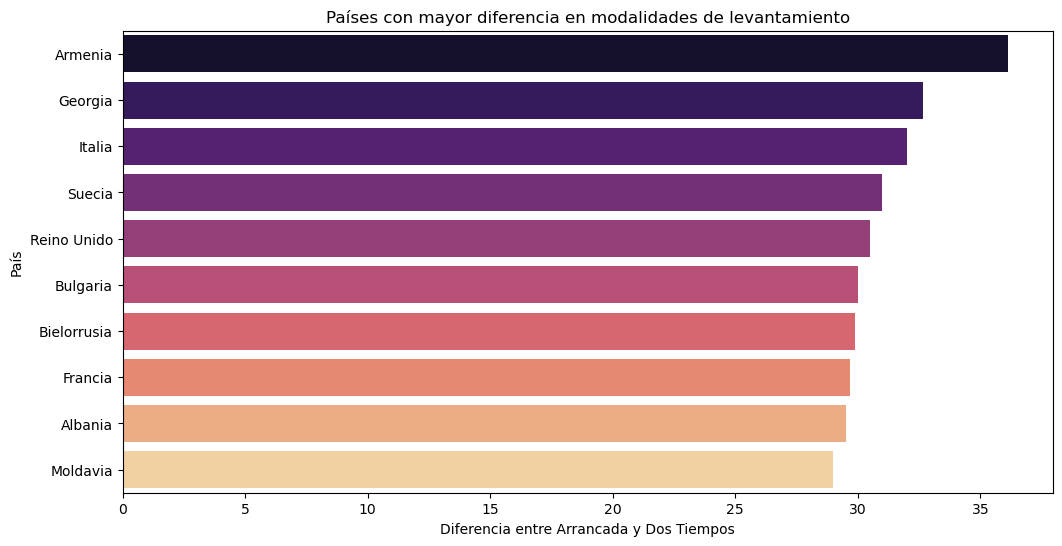

In [954]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rendimiento_pais.head(10), x="Diferencia", y="Pais", palette="magma")
plt.xlabel("Diferencia entre Arrancada y Dos Tiempos")
plt.ylabel("País")
plt.title("Países con mayor diferencia en modalidades de levantamiento")
plt.show()

### ¿Hay países donde un género destaca claramente sobre el otro?

In [955]:
rendimiento_genero_pais = df_final_19_21.groupby(["Pais", "Genero"])["Total"].mean().unstack()

In [956]:
rendimiento_genero_pais.head()

Genero,Femenino,Masculino
Pais,,
Albania,<NA>,337.5
Alemania,222.0,311.0
Armenia,222.0,397.166667
Austria,231.0,<NA>
Azerbaiyn,211.0,379.0


In [957]:
rendimiento_genero_pais["Diferencia"] = abs(rendimiento_genero_pais["Femenino"] - rendimiento_genero_pais["Masculino"])

In [958]:
rendimiento_genero_pais["Diferencia"].head()

Pais
Albania            <NA>
Alemania           89.0
Armenia      175.166667
Austria            <NA>
Azerbaiyn         168.0
Name: Diferencia, dtype: Float64

In [959]:
rendimiento_genero_pais = rendimiento_genero_pais.sort_values(by="Diferencia", ascending=False)

In [960]:
rendimiento_genero_pais.head()

Genero,Femenino,Masculino,Diferencia
Pais,,,
Armenia,222.0,397.166667,175.166667
Rusia,225.647059,396.333333,170.686275
Azerbaiyn,211.0,379.0,168.0
Bielorrusia,196.0,362.428571,166.428571
Bulgaria,155.0,320.714286,165.714286


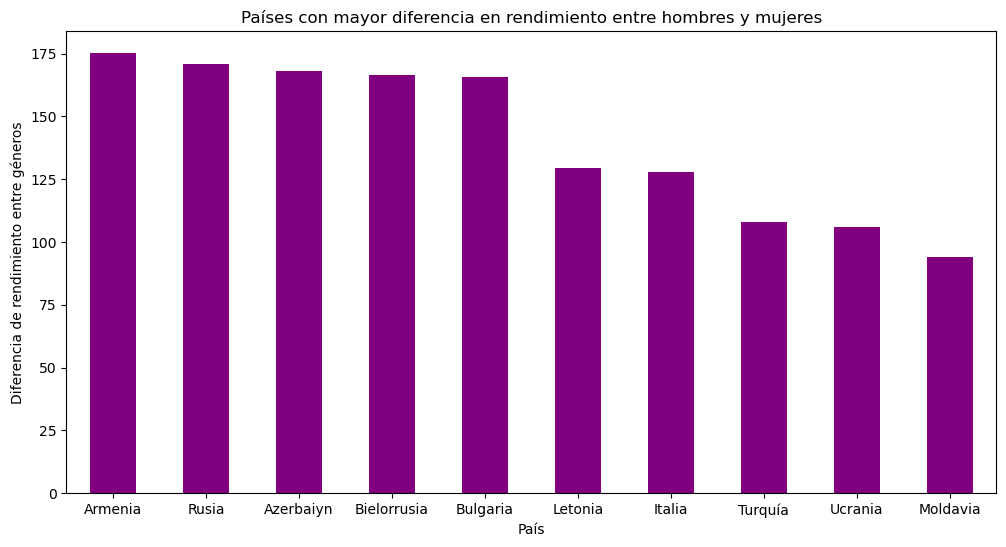

In [961]:
plt.figure(figsize=(12, 6))
rendimiento_genero_pais["Diferencia"].head(10).plot(kind="bar", color="purple")
plt.xlabel("País")
plt.ylabel("Diferencia de rendimiento entre géneros")
plt.title("Países con mayor diferencia en rendimiento entre hombres y mujeres")
plt.xticks(rotation=0)
plt.show()

### ¿El número total de atletas sube anualmente?

In [962]:
df_final_19_21["Año"] = df_final_19_21["Fecha"].dt.year

In [963]:
atletas_por_año = df_final_19_21.groupby("Año")["Nombre"].nunique().reset_index()
atletas_por_año.columns = ["Año", "Total_Atletas"]

In [964]:
atletas_por_año

,Año,Total_Atletas
0,2019,54
1,2021,54


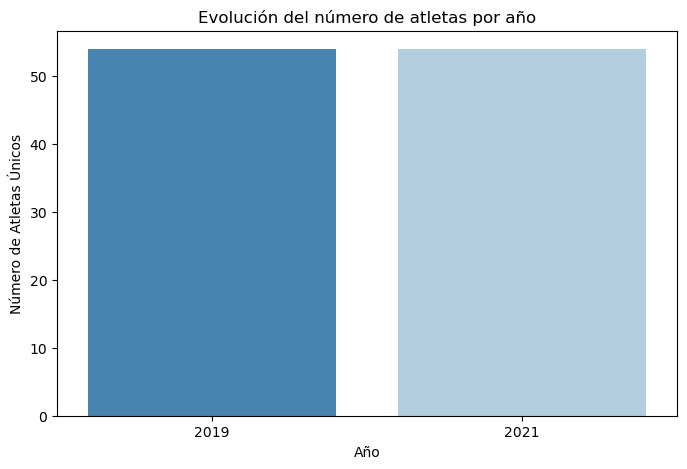

In [965]:
plt.figure(figsize=(8, 5))
sns.barplot(data=atletas_por_año, x="Año", y="Total_Atletas", palette="Blues_r")
plt.xlabel("Año")
plt.ylabel("Número de Atletas Únicos")
plt.title("Evolución del número de atletas por año")
plt.show()

### ¿El número de atletas mujeres y hombres sigue siendo el mismo?

In [966]:
df_final_19_21["Año"] = df_final_19_21["Fecha"].dt.year

In [967]:
atletas_por_año_genero = df_final_19_21.groupby(["Año", "Genero"])["Nombre"].nunique().reset_index()
atletas_por_año_genero.columns = ["Año", "Genero", "Total_Atletas"]

In [968]:
atletas_por_año_genero

,Año,Genero,Total_Atletas
0,2019,Femenino,26
1,2019,Masculino,28
2,2021,Femenino,26
3,2021,Masculino,28


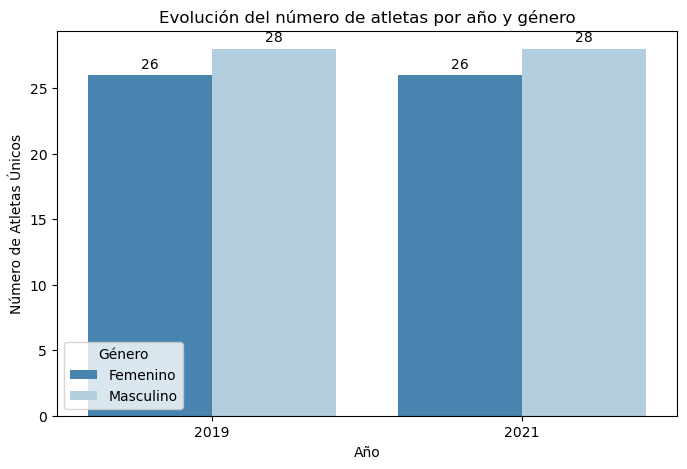

In [969]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=atletas_por_año_genero, x="Año", y="Total_Atletas", hue="Genero", palette="Blues_r")

# Añadir etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, padding=3)

# Configurar etiquetas y título
plt.xlabel("Año")
plt.ylabel("Número de Atletas Únicos")
plt.title("Evolución del número de atletas por año y género")
plt.legend(title="Género")
plt.show()

# **Fase 2.** Web scraping

## Paso 1. Importar librerías

In [970]:
from bs4 import BeautifulSoup
import requests
import html5lib

## Paso 2. Cargar datos

In [971]:
url_22 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022'

url_23 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023'

url_24 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024'

In [972]:
page_22 = requests.get(url_22)

page_23 = requests.get(url_23)

page_24 = requests.get(url_24)

In [973]:
headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

In [974]:
page_22 = requests.get(url_22, headers = headers)
page_22

<Response [200]>

In [975]:
page_23 = requests.get(url_23, headers = headers)
page_23

<Response [200]>

In [976]:
page_24 = requests.get(url_24, headers = headers)
page_24

<Response [200]>

In [977]:
response_22= requests.get('https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022')
response_22

<Response [200]>

In [978]:
response_23 = requests.get('https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023')
response_23

<Response [200]>

In [979]:
response_24 = requests.get('https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024')
response_24

<Response [200]>

In [980]:
soup_22 = BeautifulSoup(response_22.text, 'html.parser')

In [981]:
soup_23 = BeautifulSoup(response_23.text, 'html.parser')

In [982]:
soup_24 = BeautifulSoup(response_24.text, 'html.parser')

## Paso 3. Exploración inicial

In [983]:
response_22 = pd.read_html('https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022')

In [984]:
len(response_22)

7

In [985]:
type(response_22)

list

In [986]:
range(len(response_22))

range(0, 7)

In [987]:
dict_datos = {}

for i in range(len(response_22)):
    print(i)
    dict_datos['Tabla22_' + str(i)] = response_22[i]

0
1
2
3
4
5
6


In [988]:
dict_datos.keys()

dict_keys(['Tabla22_0', 'Tabla22_1', 'Tabla22_2', 'Tabla22_3', 'Tabla22_4', 'Tabla22_5', 'Tabla22_6'])

In [989]:
response_23 = pd.read_html('https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023')

In [990]:
len(response_23)

7

In [991]:
type(response_23)

list

In [992]:
range(len(response_23))

range(0, 7)

In [993]:
dict_datos = {}

for i in range(len(response_23)):
    print(i)
    dict_datos['Tabla23_' + str(i)] = response_23[i]

0
1
2
3
4
5
6


In [994]:
dict_datos.keys()

dict_keys(['Tabla23_0', 'Tabla23_1', 'Tabla23_2', 'Tabla23_3', 'Tabla23_4', 'Tabla23_5', 'Tabla23_6'])

In [995]:
response_24 = pd.read_html('https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024')

In [996]:
len(response_24)

7

In [997]:
type(response_24)

list

In [998]:
range(len(response_24))

range(0, 7)

In [999]:
dict_datos = {}

for i in range(len(response_22)):
    print(i)
    dict_datos['Tabla24_' + str(i)] = response_23[i]

0
1
2
3
4
5
6


In [1000]:
dict_datos.keys()

dict_keys(['Tabla24_0', 'Tabla24_1', 'Tabla24_2', 'Tabla24_3', 'Tabla24_4', 'Tabla24_5', 'Tabla24_6'])

## Paso 4. Crear un único dataframe con los datos de 2019, 2020, 2021, 2022, 2023 y 2024

#### Crear df_22_m (Masculino) y df_22_f (femenino), les creo una columna ['Genero'] a cada una de ellas y luego las concateno

In [1001]:
for i in range(len(response_22)):
    print(i)
    display(response_22[i].head())

0


,Campeonato Europeo de Halterofilia Tirana 2022,Campeonato Europeo de Halterofilia Tirana 2022.1,Campeonato Europeo de Halterofilia Tirana 2022.2
0,Halterofilia,Halterofilia,Halterofilia
1,Datos generales,Datos generales,Datos generales
2,Sede,Tirana Albania,Tirana Albania
3,Recinto,Tirana Olympic Park,Tirana Olympic Park
4,Categoría,Absoluta,Absoluta


1


,0,1,2
0,Moscú 2021,Tirana 2022,Ereván 2023


2


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343


3


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,45 kg (28.05),Şaziye Erdoğan Turquía 73 + 90 = 163[n 1]​,Cansu Bektaş Turquía 68 + 85 = 153[n 1]​,Radmila Zagorac Serbia 68 + 84 = 152[n 1]​
1,49 kg (28.05),Giulia Imperio Italia 79 + 92 = 171,Anhelina Lomachynska Ucrania 80 + 87 = 167,María Giménez-Guervos España 72 + 91 = 163
2,55 kg (29.05),Evagjelia Veli Albania 95 + 113 = 208,Kamila Konotop Ucrania 94 + 11 = 207,Nina Sterckx Bélgica 94 + 111 = 205
3,59 kg (30.05),Dora Tchakounté Francia 96 + 117 = 213,Lucrezia Magistris Italia 98 + 114 = 212,Ine Andersson Noruega 90 + 118 = 208
4,64 kg (31.05),Mariya Hanhur Ucrania 102 + 120 = 222,Nuray Güngör Turquía 99 + 120 = 219,Vicky Graillot Francia 89 + 119 = 208


4


,Núm.,País,Unnamed: 2,Unnamed: 3,Unnamed: 4,Total
0,1.0,Bulgaria,5,1,2,8
1,2.0,Ucrania,2,4,1,7
2,3.0,Armenia,2,3,2,7
3,3.0,Turquía,2,3,2,7
4,5.0,Italia,2,1,0,3


5


,0,1,2
0,Predecesor: Moscú 2021 Rusia,Campeonato Europeo de Halterofilia C edición,Sucesor: Ereván 2023 Armenia


6


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q111220566


##### df_22_m

In [1002]:
# Almaceno la tabla que se encuentra en el índice 2
tabla_22_m = response_22[2]

In [1003]:
print(type(tabla_22_m))


<class 'pandas.core.frame.DataFrame'>


In [1004]:
df_22_m = tabla_22_m


In [1005]:
# Añado la columna Genero asignándole el género correspondiente
df_22_m["Genero"] = "Masculino"

# Añado la columna año asignándole el año correspondiente
df_22_m["Año"] = "2022"

In [1006]:
df_22_m

,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero,Año
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Masculino,2022
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Masculino,2022
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Masculino,2022
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Masculino,2022
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Masculino,2022
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369,Masculino,2022
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Masculino,2022
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384,Masculino,2022
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371,Masculino,2022
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,Masculino,2022


In [1007]:
df_22_m.rename(columns={'Unnamed: 1': 'Oro', 'Unnamed: 2': 'Plata', 'Unnamed: 3': 'Bronce'}, inplace=True)

In [1008]:
df_22_m

,Evento,Oro,Plata,Bronce,Genero,Año
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Masculino,2022
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Masculino,2022
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Masculino,2022
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Masculino,2022
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Masculino,2022
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369,Masculino,2022
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Masculino,2022
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384,Masculino,2022
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371,Masculino,2022
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,Masculino,2022


##### df_22_f

In [1009]:
# Almaceno la tabla que se encuentra en el índice 2
tabla_22_f = response_22[3]

In [1010]:
print(type(tabla_22_f))

<class 'pandas.core.frame.DataFrame'>


In [1011]:
df_22_f = tabla_22_f

In [1012]:
df_22_f["Genero"] = "Femenino"

# Añado la columna año asignándole el año correspondiente
df_22_f["Año"] = "2022"

In [1013]:
df_22_f

,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero,Año
0,45 kg (28.05),Şaziye Erdoğan Turquía 73 + 90 = 163[n 1]​,Cansu Bektaş Turquía 68 + 85 = 153[n 1]​,Radmila Zagorac Serbia 68 + 84 = 152[n 1]​,Femenino,2022
1,49 kg (28.05),Giulia Imperio Italia 79 + 92 = 171,Anhelina Lomachynska Ucrania 80 + 87 = 167,María Giménez-Guervos España 72 + 91 = 163,Femenino,2022
2,55 kg (29.05),Evagjelia Veli Albania 95 + 113 = 208,Kamila Konotop Ucrania 94 + 11 = 207,Nina Sterckx Bélgica 94 + 111 = 205,Femenino,2022
3,59 kg (30.05),Dora Tchakounté Francia 96 + 117 = 213,Lucrezia Magistris Italia 98 + 114 = 212,Ine Andersson Noruega 90 + 118 = 208,Femenino,2022
4,64 kg (31.05),Mariya Hanhur Ucrania 102 + 120 = 222,Nuray Güngör Turquía 99 + 120 = 219,Vicky Graillot Francia 89 + 119 = 208,Femenino,2022
5,71 kg (01.06),Patricia Strenius Suecia 94 + 130 = 224,Lisa Marie Schweizer Alemania 103 + 120 = 223,Monika Marach Polonia 99 + 116 = 215,Femenino,2022
6,76 kg (02.06),Marie Fegue Francia 110 + 135 = 245,Daniela Ivanova Letonia 96 + 126 = 222,Dilara Ucan Turquía 99 + 121 = 220,Femenino,2022
7,81 kg (03.06),Iryna Deja Ucrania 116 + 137 = 253,Alina Marushchak Ucrania 108 + 127 = 235,Dilara Narin Turquía 99 + 133 = 232,Femenino,2022
8,87 kg (04.06),Solfrid Koanda Noruega 109 + 143 = 252,Anastasiya Manievska Ucrania 107 + 130 = 237,Anastasiya Hotfrid Georgia 106 + 129 = 235,Femenino,2022
9,+87 kg (05.06),Emily Campbell Reino Unido 118 + 153 = 271,Melike Günal Turquía 108 + 134 = 242,Sarah Fischer Austria 102 + 128 = 230,Femenino,2022


In [1014]:
df_22_f.rename(columns={'Unnamed: 1': 'Oro', 'Unnamed: 2': 'Plata', 'Unnamed: 3': 'Bronce'}, inplace=True)

In [1015]:
df_22_f

,Evento,Oro,Plata,Bronce,Genero,Año
0,45 kg (28.05),Şaziye Erdoğan Turquía 73 + 90 = 163[n 1]​,Cansu Bektaş Turquía 68 + 85 = 153[n 1]​,Radmila Zagorac Serbia 68 + 84 = 152[n 1]​,Femenino,2022
1,49 kg (28.05),Giulia Imperio Italia 79 + 92 = 171,Anhelina Lomachynska Ucrania 80 + 87 = 167,María Giménez-Guervos España 72 + 91 = 163,Femenino,2022
2,55 kg (29.05),Evagjelia Veli Albania 95 + 113 = 208,Kamila Konotop Ucrania 94 + 11 = 207,Nina Sterckx Bélgica 94 + 111 = 205,Femenino,2022
3,59 kg (30.05),Dora Tchakounté Francia 96 + 117 = 213,Lucrezia Magistris Italia 98 + 114 = 212,Ine Andersson Noruega 90 + 118 = 208,Femenino,2022
4,64 kg (31.05),Mariya Hanhur Ucrania 102 + 120 = 222,Nuray Güngör Turquía 99 + 120 = 219,Vicky Graillot Francia 89 + 119 = 208,Femenino,2022
5,71 kg (01.06),Patricia Strenius Suecia 94 + 130 = 224,Lisa Marie Schweizer Alemania 103 + 120 = 223,Monika Marach Polonia 99 + 116 = 215,Femenino,2022
6,76 kg (02.06),Marie Fegue Francia 110 + 135 = 245,Daniela Ivanova Letonia 96 + 126 = 222,Dilara Ucan Turquía 99 + 121 = 220,Femenino,2022
7,81 kg (03.06),Iryna Deja Ucrania 116 + 137 = 253,Alina Marushchak Ucrania 108 + 127 = 235,Dilara Narin Turquía 99 + 133 = 232,Femenino,2022
8,87 kg (04.06),Solfrid Koanda Noruega 109 + 143 = 252,Anastasiya Manievska Ucrania 107 + 130 = 237,Anastasiya Hotfrid Georgia 106 + 129 = 235,Femenino,2022
9,+87 kg (05.06),Emily Campbell Reino Unido 118 + 153 = 271,Melike Günal Turquía 108 + 134 = 242,Sarah Fischer Austria 102 + 128 = 230,Femenino,2022


##### Crear df_22: concateno df_22_m y df_22_f

In [1016]:
df_22_m = df_22_m.reset_index(drop=True)
df_22_f = df_22_f.reset_index(drop=True)
df_22 = pd.concat([df_22_m, df_22_f], ignore_index=True)

In [1139]:
df_22

,Evento,Oro,Plata,Bronce,Genero,Año
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Masculino,2022
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Masculino,2022
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Masculino,2022
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Masculino,2022
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Masculino,2022
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369,Masculino,2022
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Masculino,2022
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384,Masculino,2022
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371,Masculino,2022
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,Masculino,2022


#### Crear df_23_m (Masculino) y df_23_f (femenino), les creo una columna ['Genero'] a cada una de ellas y luego las concateno

In [1018]:
for i in range(len(response_23)):
    print(i)
    display(response_23[i].head())

0


,Campeonato Europeo de Halterofilia Ereván 2023,Campeonato Europeo de Halterofilia Ereván 2023.1,Campeonato Europeo de Halterofilia Ereván 2023.2
0,Halterofilia,Halterofilia,Halterofilia
1,Complejo Karen Demirchian,Complejo Karen Demirchian,Complejo Karen Demirchian
2,Datos generales,Datos generales,Datos generales
3,Sede,Ereván Armenia,Ereván Armenia
4,Recinto,Complejo Karen Demirchyan,Complejo Karen Demirchyan


1


,0,1,2
0,Tirana 2022,Ereván 2023,Sofía 2024


2


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337


3


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,45 kg (15.04),Cansu Bektaş Turquía 72 + 90 = 162[n 1]​,Adriana Pană Rumania 70 + 83 = 153[n 1]​,Marta García Rincón España 68 + 85 = 153[n 1]​
1,49 kg (15.04),Mihaela Cambei Rumania 92 + 106 = 198,Giulia Imperio Italia 83 + 100 = 183,Anhelina Lomachynska Ucrania 81 + 95 = 176
2,55 kg (16.04),Andreea Cotruță Rumania 91 + 110 = 201,Svitlana Samuliak Ucrania 90 + 109 = 199,Izabella Yailian Armenia 87 + 109 = 196
3,59 kg (17.04),Kamila Konotop Ucrania 106 + 129 = 235,Nina Sterckx Bélgica 93 + 116 = 209,Nadiya Shpylka Ucrania 93 +114 = 207
4,64 kg (18.04),Nuray Güngör Turquía 99 + 120 = 219,Mariya Hanhur Ucrania 98 + 116 = 214,Zoe Smith Reino Unido 93 + 121 = 214


4


,Núm.,País,Unnamed: 2,Unnamed: 3,Unnamed: 4,Total
0,1.0,Armenia,4,4,5,13
1,2.0,Rumania,3,1,1,5
2,3.0,Georgia,2,4,0,6
3,4.0,Ucrania,2,3,3,8
4,5.0,Turquía,2,2,1,5


5


,0,1,2
0,Predecesor: Tirana 2022 Albania,Campeonato Europeo de Halterofilia CI edición,Sucesor: Sofía 2024 Bulgaria


6


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q113502548 Multim...


##### df_23_m

In [1019]:
# Almaceno la tabla que se encuentra en el índice 2
tabla_23_m = response_23[2]

In [1020]:
# Verifico el tipo de "tabla_23_m" ya que si es un dataframe, tan solo lo almaceno en una variable con otro nombre y si es una lista debo crear el df
print(type(tabla_23_m))

<class 'pandas.core.frame.DataFrame'>


In [1021]:
# Almaceno mi df en la variable df_23_m
df_23_m = tabla_23_m

In [1022]:
# Añado la columna Genero, asignándole el valor "Masculino", puesto que este df correspone a la categoria masculina
df_23_m["Genero"] = "Masculino"

# Añado la columna año asignándole el año correspondiente
df_23_m["Año"] = "2023"

In [1023]:
df_23_m

,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero,Año
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino,2023
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277,Masculino,2023
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301,Masculino,2023
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335,Masculino,2023
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337,Masculino,2023
5,89 kg (20.04),Karlos Nasar Bulgaria 174 + 221 = 395,Andranik Karapetian Armenia 178 + 196 = 374,Marin Robu Moldavia 166 + 198 = 364,Masculino,2023
6,96 kg (21.04),Davit Hovhannisian Armenia 172 + 205 = 377,Ara Aghanian Armenia 165 + 199 = 364,Cristiano Ficco Italia 165 + 198 = 363,Masculino,2023
7,102 kg (22.04),Garik Karapetian Armenia 178 + 214 = 392,Irakli Chjeidze Georgia 173 + 214 = 387,Tudor Bratu Moldavia 170 + 204 = 374,Masculino,2023
8,109 kg (22.04),Samvel Gasparian Armenia 175 + 220 = 395,Guiorgui Chjeidze Georgia 173 + 208 = 381,Petros Petrosian Armenia 165 + 214 = 379,Masculino,2023
9,+109 kg (23.04),Lasha Talajadze Georgia 222 + 252 = 474,Varazdat Lalayan Armenia 212 + 250 = 462,Simon Martirosian Armenia 195 + 245 = 440,Masculino,2023


In [1024]:
# Cambio los nombre que vienen por defecto
df_23_m.rename(columns={'Unnamed: 1': 'Oro', 'Unnamed: 2': 'Plata', 'Unnamed: 3': 'Bronce'}, inplace=True)

In [1025]:
df_23_m

,Evento,Oro,Plata,Bronce,Genero,Año
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino,2023
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277,Masculino,2023
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301,Masculino,2023
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335,Masculino,2023
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337,Masculino,2023
5,89 kg (20.04),Karlos Nasar Bulgaria 174 + 221 = 395,Andranik Karapetian Armenia 178 + 196 = 374,Marin Robu Moldavia 166 + 198 = 364,Masculino,2023
6,96 kg (21.04),Davit Hovhannisian Armenia 172 + 205 = 377,Ara Aghanian Armenia 165 + 199 = 364,Cristiano Ficco Italia 165 + 198 = 363,Masculino,2023
7,102 kg (22.04),Garik Karapetian Armenia 178 + 214 = 392,Irakli Chjeidze Georgia 173 + 214 = 387,Tudor Bratu Moldavia 170 + 204 = 374,Masculino,2023
8,109 kg (22.04),Samvel Gasparian Armenia 175 + 220 = 395,Guiorgui Chjeidze Georgia 173 + 208 = 381,Petros Petrosian Armenia 165 + 214 = 379,Masculino,2023
9,+109 kg (23.04),Lasha Talajadze Georgia 222 + 252 = 474,Varazdat Lalayan Armenia 212 + 250 = 462,Simon Martirosian Armenia 195 + 245 = 440,Masculino,2023


##### df_23_f

In [1026]:
tabla_23_f = response_23[3]

In [1027]:
print(type(tabla_23_f))

<class 'pandas.core.frame.DataFrame'>


In [1028]:
df_23_f = tabla_23_f

In [1029]:
df_23_f

,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,45 kg (15.04),Cansu Bektaş Turquía 72 + 90 = 162[n 1]​,Adriana Pană Rumania 70 + 83 = 153[n 1]​,Marta García Rincón España 68 + 85 = 153[n 1]​
1,49 kg (15.04),Mihaela Cambei Rumania 92 + 106 = 198,Giulia Imperio Italia 83 + 100 = 183,Anhelina Lomachynska Ucrania 81 + 95 = 176
2,55 kg (16.04),Andreea Cotruță Rumania 91 + 110 = 201,Svitlana Samuliak Ucrania 90 + 109 = 199,Izabella Yailian Armenia 87 + 109 = 196
3,59 kg (17.04),Kamila Konotop Ucrania 106 + 129 = 235,Nina Sterckx Bélgica 93 + 116 = 209,Nadiya Shpylka Ucrania 93 +114 = 207
4,64 kg (18.04),Nuray Güngör Turquía 99 + 120 = 219,Mariya Hanhur Ucrania 98 + 116 = 214,Zoe Smith Reino Unido 93 + 121 = 214
5,71 kg (19.04),Loredana Toma Rumania 110 + 130 = 240,Giulia Miserendino Italia 105 + 125 = 230,Sarah Davies Reino Unido 100 + 126 = 226
6,76 kg (20.04),Marie Fegue Francia 113 + 140 = 253,Tatev Hakobian Armenia 104 + 122 = 226,Daniela Ivanova Letonia 96 + 126 = 222
7,81 kg (21.04),Iryna Deja Ucrania 123 + 135 = 258,Dilara Narin Turquía 101 + 134 = 235,Elena Erighina Moldavia 104 + 130 = 234
8,87 kg (22.04),Solfrid Koanda Noruega 117 + 155 = 272,Anastasiya Manievska Ucrania 108 + 130 = 238,Hripsime Jurshudian Armenia 107 + 120 = 227
9,+87 kg (23.04),Emily Campbell Reino Unido 110 + 143 = 253,Anastasiya Hotfrid Georgia 117+ 135 = 252,Valentyna Kisil Ucrania 111 + 133 = 244


In [1030]:
# Añado la columna Generp asignándole el género correspondiente
df_23_f['Genero'] = 'Femenino'

# Añado la columna año asignándole el año correspondiente
df_23_f['Año'] = '2023'

In [1031]:
df_23_f.rename(columns={'Unnamed: 1': 'Oro', 'Unnamed: 2': 'Plata', 'Unnamed: 3': 'Bronce'}, inplace=True)

In [1032]:
df_23_f

,Evento,Oro,Plata,Bronce,Genero,Año
0,45 kg (15.04),Cansu Bektaş Turquía 72 + 90 = 162[n 1]​,Adriana Pană Rumania 70 + 83 = 153[n 1]​,Marta García Rincón España 68 + 85 = 153[n 1]​,Femenino,2023
1,49 kg (15.04),Mihaela Cambei Rumania 92 + 106 = 198,Giulia Imperio Italia 83 + 100 = 183,Anhelina Lomachynska Ucrania 81 + 95 = 176,Femenino,2023
2,55 kg (16.04),Andreea Cotruță Rumania 91 + 110 = 201,Svitlana Samuliak Ucrania 90 + 109 = 199,Izabella Yailian Armenia 87 + 109 = 196,Femenino,2023
3,59 kg (17.04),Kamila Konotop Ucrania 106 + 129 = 235,Nina Sterckx Bélgica 93 + 116 = 209,Nadiya Shpylka Ucrania 93 +114 = 207,Femenino,2023
4,64 kg (18.04),Nuray Güngör Turquía 99 + 120 = 219,Mariya Hanhur Ucrania 98 + 116 = 214,Zoe Smith Reino Unido 93 + 121 = 214,Femenino,2023
5,71 kg (19.04),Loredana Toma Rumania 110 + 130 = 240,Giulia Miserendino Italia 105 + 125 = 230,Sarah Davies Reino Unido 100 + 126 = 226,Femenino,2023
6,76 kg (20.04),Marie Fegue Francia 113 + 140 = 253,Tatev Hakobian Armenia 104 + 122 = 226,Daniela Ivanova Letonia 96 + 126 = 222,Femenino,2023
7,81 kg (21.04),Iryna Deja Ucrania 123 + 135 = 258,Dilara Narin Turquía 101 + 134 = 235,Elena Erighina Moldavia 104 + 130 = 234,Femenino,2023
8,87 kg (22.04),Solfrid Koanda Noruega 117 + 155 = 272,Anastasiya Manievska Ucrania 108 + 130 = 238,Hripsime Jurshudian Armenia 107 + 120 = 227,Femenino,2023
9,+87 kg (23.04),Emily Campbell Reino Unido 110 + 143 = 253,Anastasiya Hotfrid Georgia 117+ 135 = 252,Valentyna Kisil Ucrania 111 + 133 = 244,Femenino,2023


##### Crear df_23: concateno df_23_m y df_23_f

In [1033]:
df_23_m = df_23_m.reset_index(drop=True)
df_23_f = df_23_f.reset_index(drop=True)
df_23 = pd.concat([df_23_m, df_23_f], ignore_index=True)

In [1034]:
df_23

,Evento,Oro,Plata,Bronce,Genero,Año
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino,2023
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277,Masculino,2023
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301,Masculino,2023
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335,Masculino,2023
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337,Masculino,2023
5,89 kg (20.04),Karlos Nasar Bulgaria 174 + 221 = 395,Andranik Karapetian Armenia 178 + 196 = 374,Marin Robu Moldavia 166 + 198 = 364,Masculino,2023
6,96 kg (21.04),Davit Hovhannisian Armenia 172 + 205 = 377,Ara Aghanian Armenia 165 + 199 = 364,Cristiano Ficco Italia 165 + 198 = 363,Masculino,2023
7,102 kg (22.04),Garik Karapetian Armenia 178 + 214 = 392,Irakli Chjeidze Georgia 173 + 214 = 387,Tudor Bratu Moldavia 170 + 204 = 374,Masculino,2023
8,109 kg (22.04),Samvel Gasparian Armenia 175 + 220 = 395,Guiorgui Chjeidze Georgia 173 + 208 = 381,Petros Petrosian Armenia 165 + 214 = 379,Masculino,2023
9,+109 kg (23.04),Lasha Talajadze Georgia 222 + 252 = 474,Varazdat Lalayan Armenia 212 + 250 = 462,Simon Martirosian Armenia 195 + 245 = 440,Masculino,2023


#### Crear df_24_m (Masculino) y df_24_f (femenino), les creo una columna ['Genero'] a cada una de ellas y luego las concateno

In [1035]:
for i in range(len(response_24)):
    print(i)
    display(response_24[i].head())

0


,Campeonato Europeo de Halterofilia Sofía 2024,Campeonato Europeo de Halterofilia Sofía 2024.1,Campeonato Europeo de Halterofilia Sofía 2024.2
0,Halterofilia,Halterofilia,Halterofilia
1,Datos generales,Datos generales,Datos generales
2,Sede,Sofía Bulgaria,Sofía Bulgaria
3,Categoría,Absoluta,Absoluta
4,Fecha,12 – 20 de febrero de 2024,12 – 20 de febrero de 2024


1


,0,1,2
0,Ereván 2023,Sofía 2024,Chisináu 2025


2


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,55 kg (13.02),Anguel Rusev Bulgaria 109 + 135 = 244[n 1]​,Ramin Shamilishvili Georgia 111 + 130 = 241[n...,Dzhan Zarkov Bulgaria 102 + 133 = 235[n 1]​
1,61 kg (13.02),Gabriel Marinov Bulgaria 121 + 160 = 281,Ivan Dimov Bulgaria 130 + 150 = 280,Shota Mishvelidze Georgia 125 + 147 = 272
2,67 kg (14.02),Gor Sahakian Armenia 140 + 171 = 311,Kaan Kahriman Turquía 142 + 168 = 310,Ferdi Hardal Turquía 135 + 169 = 304
3,73 kg (15.02),Bozhidar Andreev Bulgaria 155 + 193 = 348,Muhammed Özbek Turquía 150 + 186 = 336,Ritvars Suharevs Letonia 154 + 177 = 331
4,81 kg (16.02),Oscar Reyes Martínez Italia 155 + 191 = 346,Kristi Ramadani Albania 151 + 190 = 341,Rafik Harutiunian Armenia 154 + 182 = 336


3


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,45 kg (12.02),Cansu Bektaş Turquía 75 + 88 = 163[n 1]​,Gamze Altun Turquía 65 + 92 = 157[n 1]​,Marta García Rincón España 72 + 84 = 156[n 1]​
1,49 kg (12.02),Mihaela Cambei Rumania 90 + 109 = 199,Oliwia Drzazga Polonia 74 + 96 = 170,Tham Nguyen Irlanda 74 + 95 = 169
2,55 kg (13.02),Alexandra Grigorian Armenia 81 + 115 = 196,Celine Delia Italia 84 + 111 = 195,Sol Anette Waaler Noruega 86 + 104 = 190
3,59 kg (14.02),Kamila Konotop Ucrania 105 + 125 = 230,Dora Tchakounté Francia 98 + 117 = 215,Saara Retulainen Finlandia 95 + 119 = 214
4,64 kg (15.02),Hanna Davydova Ucrania 100 + 120 = 220,Svitlana Samuliak Ucrania 101 + 118 = 219,Wiktoria Wołk Polonia 94 + 121 = 215


4


,Núm.,País,Unnamed: 2,Unnamed: 3,Unnamed: 4,Total
0,1.0,Armenia,4,3,3,10
1,2.0,Bulgaria,4,2,1,7
2,3.0,Italia,2,2,0,4
3,3.0,Ucrania,2,2,0,4
4,5.0,Rumania,2,0,0,2


5


,0,1,2
0,Predecesor: Ereván 2023 Armenia,Campeonato Europeo de Halterofilia CII edición,Sucesor: Chisináu 2025 Moldavia


6


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q117730960


##### df_24_m

In [1036]:
# Almaceno la tabla que se encuentra en el índice 2
tabla_24_m = response_24[2]

In [1037]:
# Verifico el tipo de "tabla_23_m" ya que si es un dataframe, tan solo lo almaceno en una variable con otro nombre y si es una lista debo crear el df
print(type(tabla_24_m))

<class 'pandas.core.frame.DataFrame'>


In [1038]:
# Almaceno mi df en la variable df_23_m
df_24_m = tabla_24_m

In [1039]:
# Añado la columna Genero, asignándole el valor "Masculino", puesto que este df correspone a la categoria masculina
df_24_m["Genero"] = "Masculino"

# Añado la columna año asignándole el año correspondiente
df_24_m['Año'] = '2024'

In [1040]:
df_24_m

,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero,Año
0,55 kg (13.02),Anguel Rusev Bulgaria 109 + 135 = 244[n 1]​,Ramin Shamilishvili Georgia 111 + 130 = 241[n...,Dzhan Zarkov Bulgaria 102 + 133 = 235[n 1]​,Masculino,2024
1,61 kg (13.02),Gabriel Marinov Bulgaria 121 + 160 = 281,Ivan Dimov Bulgaria 130 + 150 = 280,Shota Mishvelidze Georgia 125 + 147 = 272,Masculino,2024
2,67 kg (14.02),Gor Sahakian Armenia 140 + 171 = 311,Kaan Kahriman Turquía 142 + 168 = 310,Ferdi Hardal Turquía 135 + 169 = 304,Masculino,2024
3,73 kg (15.02),Bozhidar Andreev Bulgaria 155 + 193 = 348,Muhammed Özbek Turquía 150 + 186 = 336,Ritvars Suharevs Letonia 154 + 177 = 331,Masculino,2024
4,81 kg (16.02),Oscar Reyes Martínez Italia 155 + 191 = 346,Kristi Ramadani Albania 151 + 190 = 341,Rafik Harutiunian Armenia 154 + 182 = 336,Masculino,2024
5,89 kg (17.02),Karlos Nasar Bulgaria 176 + 215 = 391,Antonino Pizzolato Italia 170 + 210 = 380,Marin Robu Moldavia 171+ 207 = 378,Masculino,2024
6,96 kg (18.02),Hakob Mkrtchian Armenia 166 + 209 = 375,Davit Hovhannisian Armenia 169 + 205 = 374,Pavel Jadasevich AIN[a 1]​ 165 + 195 = 360,Masculino,2024
7,102 kg (19.02),Yauheni Tsijantsou AIN[a 1]​ 181 + 217 = 398,Samvel Gasparian Armenia 180 + 216 = 396,Garik Karapetian Armenia 182 + 212 = 394,Masculino,2024
8,109 kg (19.02),Dadaş Dadaşbəyli Azerbaiyán 176 + 212 = 388,Jristo Jristov Bulgaria 175 + 205 = 380,Matthäus Hofmann Alemania 172 + 206 = 378,Masculino,2024
9,+109 kg (20.02),Varazdat Lalayan Armenia 205 + 250 = 455,Simon Martirosian Armenia 190 + 247 = 437,Eduard Ziaziulin AIN[a 1]​ 195 + 241 = 436,Masculino,2024


In [1041]:
# Cambio los nombre que vienen por defecto
df_24_m.rename(columns={'Unnamed: 1': 'Oro', 'Unnamed: 2': 'Plata', 'Unnamed: 3': 'Bronce'}, inplace=True)

In [1042]:
df_24_m

,Evento,Oro,Plata,Bronce,Genero,Año
0,55 kg (13.02),Anguel Rusev Bulgaria 109 + 135 = 244[n 1]​,Ramin Shamilishvili Georgia 111 + 130 = 241[n...,Dzhan Zarkov Bulgaria 102 + 133 = 235[n 1]​,Masculino,2024
1,61 kg (13.02),Gabriel Marinov Bulgaria 121 + 160 = 281,Ivan Dimov Bulgaria 130 + 150 = 280,Shota Mishvelidze Georgia 125 + 147 = 272,Masculino,2024
2,67 kg (14.02),Gor Sahakian Armenia 140 + 171 = 311,Kaan Kahriman Turquía 142 + 168 = 310,Ferdi Hardal Turquía 135 + 169 = 304,Masculino,2024
3,73 kg (15.02),Bozhidar Andreev Bulgaria 155 + 193 = 348,Muhammed Özbek Turquía 150 + 186 = 336,Ritvars Suharevs Letonia 154 + 177 = 331,Masculino,2024
4,81 kg (16.02),Oscar Reyes Martínez Italia 155 + 191 = 346,Kristi Ramadani Albania 151 + 190 = 341,Rafik Harutiunian Armenia 154 + 182 = 336,Masculino,2024
5,89 kg (17.02),Karlos Nasar Bulgaria 176 + 215 = 391,Antonino Pizzolato Italia 170 + 210 = 380,Marin Robu Moldavia 171+ 207 = 378,Masculino,2024
6,96 kg (18.02),Hakob Mkrtchian Armenia 166 + 209 = 375,Davit Hovhannisian Armenia 169 + 205 = 374,Pavel Jadasevich AIN[a 1]​ 165 + 195 = 360,Masculino,2024
7,102 kg (19.02),Yauheni Tsijantsou AIN[a 1]​ 181 + 217 = 398,Samvel Gasparian Armenia 180 + 216 = 396,Garik Karapetian Armenia 182 + 212 = 394,Masculino,2024
8,109 kg (19.02),Dadaş Dadaşbəyli Azerbaiyán 176 + 212 = 388,Jristo Jristov Bulgaria 175 + 205 = 380,Matthäus Hofmann Alemania 172 + 206 = 378,Masculino,2024
9,+109 kg (20.02),Varazdat Lalayan Armenia 205 + 250 = 455,Simon Martirosian Armenia 190 + 247 = 437,Eduard Ziaziulin AIN[a 1]​ 195 + 241 = 436,Masculino,2024


##### df_24_f

In [1043]:
# Almaceno la tabla que se encuentra en el índice 2
tabla_24_f = response_24[3]

In [1044]:
# Verifico el tipo de "tabla_23_m" ya que si es un dataframe, tan solo lo almaceno en una variable con otro nombre y si es una lista debo crear el df
print(type(tabla_24_f))

<class 'pandas.core.frame.DataFrame'>


In [1045]:
# Almaceno mi df en la variable df_23_m
df_24_f = tabla_24_f

In [1046]:
# Añado la columna Genero, asignándole el valor "Femenino", puesto que este df correspone a la categoria masculina
df_24_f["Genero"] = "Femenino"

# Añado la columna año asignándole el año correspondiente
df_24_f['Año'] = '2024'

In [1047]:
df_24_f

,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero,Año
0,45 kg (12.02),Cansu Bektaş Turquía 75 + 88 = 163[n 1]​,Gamze Altun Turquía 65 + 92 = 157[n 1]​,Marta García Rincón España 72 + 84 = 156[n 1]​,Femenino,2024
1,49 kg (12.02),Mihaela Cambei Rumania 90 + 109 = 199,Oliwia Drzazga Polonia 74 + 96 = 170,Tham Nguyen Irlanda 74 + 95 = 169,Femenino,2024
2,55 kg (13.02),Alexandra Grigorian Armenia 81 + 115 = 196,Celine Delia Italia 84 + 111 = 195,Sol Anette Waaler Noruega 86 + 104 = 190,Femenino,2024
3,59 kg (14.02),Kamila Konotop Ucrania 105 + 125 = 230,Dora Tchakounté Francia 98 + 117 = 215,Saara Retulainen Finlandia 95 + 119 = 214,Femenino,2024
4,64 kg (15.02),Hanna Davydova Ucrania 100 + 120 = 220,Svitlana Samuliak Ucrania 101 + 118 = 219,Wiktoria Wołk Polonia 94 + 121 = 215,Femenino,2024
5,71 kg (16.02),Loredana Toma Rumania 114 + 127 = 241,Siuzanna Valodzka AIN[a 1]​ 105 + 130 = 235,Lisa Marie Schweizer Alemania 107 + 124 = 231,Femenino,2024
6,76 kg (17.02),Genna Toko Kegne Italia 101 + 120 = 221,Nikol Rubanovich Israel 99 + 117 = 216,Lara Dancz Alemania 101 + 114 = 215,Femenino,2024
7,81 kg (18.02),Weronika Zielińska-Stubińska Polonia 103 + 13...,Elena Erighina Moldavia 103+ 131 = 234,Dilara Narin Turquía 97 + 125 = 222,Femenino,2024
8,87 kg (19.02),Solfrid Koanda Noruega 120 + 160 = 280,Anastasiya Manievska Ucrania 102 + 128 = 230,Hripsime Jurshudian Armenia 105 + 122 = 227,Femenino,2024
9,+87 kg (20.02),Emily Campbell Reino Unido 112 + 151 = 263,Anastasiya Hotfrid Georgia 117 + 140 = 257,Fatmagül Çevik Turquía 107 + 131 = 238,Femenino,2024


In [1048]:
# Cambio los nombre que vienen por defecto
df_24_f.rename(columns={'Unnamed: 1': 'Oro', 'Unnamed: 2': 'Plata', 'Unnamed: 3': 'Bronce'}, inplace=True)

In [1049]:
df_24_f

,Evento,Oro,Plata,Bronce,Genero,Año
0,45 kg (12.02),Cansu Bektaş Turquía 75 + 88 = 163[n 1]​,Gamze Altun Turquía 65 + 92 = 157[n 1]​,Marta García Rincón España 72 + 84 = 156[n 1]​,Femenino,2024
1,49 kg (12.02),Mihaela Cambei Rumania 90 + 109 = 199,Oliwia Drzazga Polonia 74 + 96 = 170,Tham Nguyen Irlanda 74 + 95 = 169,Femenino,2024
2,55 kg (13.02),Alexandra Grigorian Armenia 81 + 115 = 196,Celine Delia Italia 84 + 111 = 195,Sol Anette Waaler Noruega 86 + 104 = 190,Femenino,2024
3,59 kg (14.02),Kamila Konotop Ucrania 105 + 125 = 230,Dora Tchakounté Francia 98 + 117 = 215,Saara Retulainen Finlandia 95 + 119 = 214,Femenino,2024
4,64 kg (15.02),Hanna Davydova Ucrania 100 + 120 = 220,Svitlana Samuliak Ucrania 101 + 118 = 219,Wiktoria Wołk Polonia 94 + 121 = 215,Femenino,2024
5,71 kg (16.02),Loredana Toma Rumania 114 + 127 = 241,Siuzanna Valodzka AIN[a 1]​ 105 + 130 = 235,Lisa Marie Schweizer Alemania 107 + 124 = 231,Femenino,2024
6,76 kg (17.02),Genna Toko Kegne Italia 101 + 120 = 221,Nikol Rubanovich Israel 99 + 117 = 216,Lara Dancz Alemania 101 + 114 = 215,Femenino,2024
7,81 kg (18.02),Weronika Zielińska-Stubińska Polonia 103 + 13...,Elena Erighina Moldavia 103+ 131 = 234,Dilara Narin Turquía 97 + 125 = 222,Femenino,2024
8,87 kg (19.02),Solfrid Koanda Noruega 120 + 160 = 280,Anastasiya Manievska Ucrania 102 + 128 = 230,Hripsime Jurshudian Armenia 105 + 122 = 227,Femenino,2024
9,+87 kg (20.02),Emily Campbell Reino Unido 112 + 151 = 263,Anastasiya Hotfrid Georgia 117 + 140 = 257,Fatmagül Çevik Turquía 107 + 131 = 238,Femenino,2024


##### Crear df_24: concateno df_24_m y df_24_f

In [1050]:
df_24_m = df_24_m.reset_index(drop=True)
df_24_f = df_24_f.reset_index(drop=True)
df_24 = pd.concat([df_24_m, df_24_f], ignore_index=True)

In [1051]:
df_24

,Evento,Oro,Plata,Bronce,Genero,Año
0,55 kg (13.02),Anguel Rusev Bulgaria 109 + 135 = 244[n 1]​,Ramin Shamilishvili Georgia 111 + 130 = 241[n...,Dzhan Zarkov Bulgaria 102 + 133 = 235[n 1]​,Masculino,2024
1,61 kg (13.02),Gabriel Marinov Bulgaria 121 + 160 = 281,Ivan Dimov Bulgaria 130 + 150 = 280,Shota Mishvelidze Georgia 125 + 147 = 272,Masculino,2024
2,67 kg (14.02),Gor Sahakian Armenia 140 + 171 = 311,Kaan Kahriman Turquía 142 + 168 = 310,Ferdi Hardal Turquía 135 + 169 = 304,Masculino,2024
3,73 kg (15.02),Bozhidar Andreev Bulgaria 155 + 193 = 348,Muhammed Özbek Turquía 150 + 186 = 336,Ritvars Suharevs Letonia 154 + 177 = 331,Masculino,2024
4,81 kg (16.02),Oscar Reyes Martínez Italia 155 + 191 = 346,Kristi Ramadani Albania 151 + 190 = 341,Rafik Harutiunian Armenia 154 + 182 = 336,Masculino,2024
5,89 kg (17.02),Karlos Nasar Bulgaria 176 + 215 = 391,Antonino Pizzolato Italia 170 + 210 = 380,Marin Robu Moldavia 171+ 207 = 378,Masculino,2024
6,96 kg (18.02),Hakob Mkrtchian Armenia 166 + 209 = 375,Davit Hovhannisian Armenia 169 + 205 = 374,Pavel Jadasevich AIN[a 1]​ 165 + 195 = 360,Masculino,2024
7,102 kg (19.02),Yauheni Tsijantsou AIN[a 1]​ 181 + 217 = 398,Samvel Gasparian Armenia 180 + 216 = 396,Garik Karapetian Armenia 182 + 212 = 394,Masculino,2024
8,109 kg (19.02),Dadaş Dadaşbəyli Azerbaiyán 176 + 212 = 388,Jristo Jristov Bulgaria 175 + 205 = 380,Matthäus Hofmann Alemania 172 + 206 = 378,Masculino,2024
9,+109 kg (20.02),Varazdat Lalayan Armenia 205 + 250 = 455,Simon Martirosian Armenia 190 + 247 = 437,Eduard Ziaziulin AIN[a 1]​ 195 + 241 = 436,Masculino,2024


#### Concatenar los 3 años: 2022, 2023 y 2024

In [1052]:
df_234 = pd.concat([df_22, df_23, df_24], ignore_index=True)

In [1053]:
df_234.rename(columns={"Evento": "Eventos"}, inplace= True)

In [1054]:
df_234.head(0)

,Eventos,Oro,Plata,Bronce,Genero,Año


In [1140]:
df_234

,Eventos,Oro,Plata,Bronce,Genero,Año
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Masculino,2022
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Masculino,2022
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Masculino,2022
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Masculino,2022
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Masculino,2022
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369,Masculino,2022
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Masculino,2022
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384,Masculino,2022
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371,Masculino,2022
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,Masculino,2022


## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [1055]:
# Seleccionamos las columnas del df_19_21 que queremos en el nuevo df
columnas = ['Eventos', 'Año', 'Genero']

# Creamos el DF con las columnas
df_aux_2 = df_234[columnas]


In [1056]:
df_aux_2 = pd.melt(df_234, id_vars=['Eventos', 'Año', 'Genero'], var_name="Medalla", value_name="Atleta")

In [1057]:
df_aux_2.isnull().sum()

Eventos    0
Año        0
Genero     0
Medalla    0
Atleta     0
dtype: int64

In [1058]:
df_aux_2

,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (29.05),2022,Masculino,Oro,Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​
1,61 kg (29.05),2022,Masculino,Oro,Ivan Dimov Bulgaria 135 + 151 = 286
2,67 kg (30.05),2022,Masculino,Oro,Valentin Guenchev Bulgaria 139 + 175 = 314
3,73 kg (31.05),2022,Masculino,Oro,Muhammed Özbek Turquía 149 + 190 = 339
4,81 kg (01.06),2022,Masculino,Oro,Rafik Harutiunian Armenia 160 + 194 = 354
...,...,...,...,...,...
175,71 kg (16.02),2024,Femenino,Bronce,Lisa Marie Schweizer Alemania 107 + 124 = 231
176,76 kg (17.02),2024,Femenino,Bronce,Lara Dancz Alemania 101 + 114 = 215
177,81 kg (18.02),2024,Femenino,Bronce,Dilara Narin Turquía 97 + 125 = 222
178,87 kg (19.02),2024,Femenino,Bronce,Hripsime Jurshudian Armenia 105 + 122 = 227


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [1059]:
# Habia algunas filas que tenian [N 2], así que lo borramos con la siguiente sentenci
df_aux_2['Eventos'] = df_aux_2['Eventos'].str.replace(r'\[.*?\]', '', regex=True)

# Creamos esta sentencia (con función lambda) para reemplazar los espacios "raros" en normales para que podamos realizar la separación en 3 columnas
df_aux_2['Eventos'] = df_aux_2['Eventos'].apply(lambda x: x.replace('\xa0', ' ').replace('\u200b', ' ') if isinstance(x, str) else x)

# Creo la expresión regular para la columna Eventos, así luego puedo extraer la información de la misma
regex_eventos_2 = r'(?P<Peso>[+\d]+)\s*(?P<Unidad>\w+)\s*\((?P<Fecha>[\d.]+)\)'

# Aplico la expresión regular "regex_eventos" a la columna Eventos
df_aux_2[['Peso', 'Unidad', 'Fecha']] = df_aux_2['Eventos'].str.extract(regex_eventos_2)

In [1060]:
df_aux_2.isnull().sum()

Eventos    0
Año        0
Genero     0
Medalla    0
Atleta     0
Peso       0
Unidad     0
Fecha      0
dtype: int64

In [1061]:
# Limpiar la columna del carácter especial \u200b:
df_aux_2["Atleta"] = df_aux_2["Atleta"].str.replace(r"\u200b", "", regex=True).str.strip()

# Eliminar cualquier texto entre corchetes
df_aux_2['Atleta'] = df_aux_2['Atleta'].str.replace(r'\[.*?\]', '', regex=True)

# Eliminar caracteres no ASCII
df_aux_2['Atleta'] = df_aux_2['Atleta'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

# Convertir la primera letra de cada palabra a mayúsculas
df_aux_2['Atleta'] = df_aux_2['Atleta'].str.title()

# Reemplazar "Reino Unido" en toda la columna "Atleta" para asegurarnos que no se separe
df_aux_2['Atleta'] = df_aux_2['Atleta'].str.replace(r'\bReino\s+Unido\b', 'ReinoUnido', regex=True)


In [1062]:
# Ahora defino la expresión regular
regex_atleta_2 = r'(?P<Nombre>[A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+(?:[\s-][A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+)*)\s+(?P<Apellido>[A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+(?:[\s-][A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+)*)\s+(?P<Pais>ReinoUnido|Estados\s+Unidos|[A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+(?:[\s-][A-ZÁÉÍÓÚÑŞİĞÇŁ][a-záéíóúñşşığçł]+)*)\s+(?P<Arrancada>\d+)\s*(?:\+\s*(?P<Dos_tiempos>\d+))?\s*=\s*(?P<Total>\d+)'

# Aplico la extracción con la expresión regular
df_aux_2[['Nombre', 'Apellido', 'Pais', 'Arrancada', 'Dos_tiempos', 'Total']] = df_aux_2['Atleta'].str.extract(regex_atleta)

# Convierto los valores numéricos a enteros
df_aux_2[['Arrancada', 'Dos_tiempos', 'Total']] = df_aux_2[['Arrancada', 'Dos_tiempos', 'Total']].apply(pd.to_numeric, errors='coerce').astype('Int64')


In [1063]:
df_aux_2.isnull().sum()

Eventos        0
Año            0
Genero         0
Medalla        0
Atleta         0
Peso           0
Unidad         0
Fecha          0
Nombre         0
Apellido       0
Pais           0
Arrancada      0
Dos_tiempos    0
Total          0
dtype: int64

In [1064]:
# Hago .value_counts() para ver los nombres de los países (con otras sentencias o no se ven enteros o es más engorrosos)
df_aux_2['Pais'].value_counts()

Pais
Armenia       30
Ucrania       19
Turqua        19
Bulgaria      18
Georgia       15
Italia        13
Espaa          9
Rumania        7
Francia        6
ReinoUnido     5
Polonia        5
Noruega        5
Alemania       5
Moldavia       5
Letonia        4
Ain            4
Albania        2
Blgica         2
Serbia         1
Irlanda        1
Austria        1
Suecia         1
Israel         1
Azerbaiyn      1
Finlandia      1
Name: count, dtype: int64

In [1065]:
# A través de la función lambda cambio Espaa por España
df_aux_2['Pais'] = df_aux_2['Pais'].apply(lambda x: "España" if x == "Espaa" else x)

# Modifico Turquía (antes era Turqua) con .replace()
df_aux_2['Pais'] = df_aux_2['Pais'].replace('Turqua', 'Turquía')

# Modifico Bélgica (antes era Blgica) con .replace()
df_aux_2['Pais'] = df_aux_2['Pais'].replace('Blgica', 'Bélgica')

In [1066]:
# De nuevo con la función lambda modifico 'Reino Unido', antes: 'ReinoUnido'
df_aux_2['Pais'] = df_aux_2['Pais'].apply(lambda x: 'Reino Unido' if x == 'ReinoUnido' else x)

In [1067]:
df_aux_2['Pais'].value_counts()

Pais
Armenia        30
Ucrania        19
Turquía        19
Bulgaria       18
Georgia        15
Italia         13
España          9
Rumania         7
Francia         6
Reino Unido     5
Polonia         5
Noruega         5
Alemania        5
Moldavia        5
Letonia         4
Ain             4
Albania         2
Bélgica         2
Serbia          1
Irlanda         1
Austria         1
Suecia          1
Israel          1
Azerbaiyn       1
Finlandia       1
Name: count, dtype: int64

In [1068]:
df_aux_2.head()

,Eventos,Año,Genero,Medalla,Atleta,Peso,Unidad,Fecha,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
0,55 kg (29.05),2022,Masculino,Oro,Anguel Rusev Bulgaria 113 + 144 = 257,55,kg,29.05,Anguel,Rusev,Bulgaria,113,144,257
1,61 kg (29.05),2022,Masculino,Oro,Ivan Dimov Bulgaria 135 + 151 = 286,61,kg,29.05,Ivan,Dimov,Bulgaria,135,151,286
2,67 kg (30.05),2022,Masculino,Oro,Valentin Guenchev Bulgaria 139 + 175 = 314,67,kg,30.05,Valentin,Guenchev,Bulgaria,139,175,314
3,73 kg (31.05),2022,Masculino,Oro,Muhammed Zbek Turqua 149 + 190 = 339,73,kg,31.05,Muhammed,Zbek,Turquía,149,190,339
4,81 kg (01.06),2022,Masculino,Oro,Rafik Harutiunian Armenia 160 + 194 = 354,81,kg,01.06,Rafik,Harutiunian,Armenia,160,194,354


In [1069]:
df_aux_2

,Eventos,Año,Genero,Medalla,Atleta,Peso,Unidad,Fecha,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
0,55 kg (29.05),2022,Masculino,Oro,Anguel Rusev Bulgaria 113 + 144 = 257,55,kg,29.05,Anguel,Rusev,Bulgaria,113,144,257
1,61 kg (29.05),2022,Masculino,Oro,Ivan Dimov Bulgaria 135 + 151 = 286,61,kg,29.05,Ivan,Dimov,Bulgaria,135,151,286
2,67 kg (30.05),2022,Masculino,Oro,Valentin Guenchev Bulgaria 139 + 175 = 314,67,kg,30.05,Valentin,Guenchev,Bulgaria,139,175,314
3,73 kg (31.05),2022,Masculino,Oro,Muhammed Zbek Turqua 149 + 190 = 339,73,kg,31.05,Muhammed,Zbek,Turquía,149,190,339
4,81 kg (01.06),2022,Masculino,Oro,Rafik Harutiunian Armenia 160 + 194 = 354,81,kg,01.06,Rafik,Harutiunian,Armenia,160,194,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,71 kg (16.02),2024,Femenino,Bronce,Lisa Marie Schweizer Alemania 107 + 124 = 231,71,kg,16.02,Lisa Marie,Schweizer,Alemania,107,124,231
176,76 kg (17.02),2024,Femenino,Bronce,Lara Dancz Alemania 101 + 114 = 215,76,kg,17.02,Lara,Dancz,Alemania,101,114,215
177,81 kg (18.02),2024,Femenino,Bronce,Dilara Narin Turqua 97 + 125 = 222,81,kg,18.02,Dilara,Narin,Turquía,97,125,222
178,87 kg (19.02),2024,Femenino,Bronce,Hripsime Jurshudian Armenia 105 + 122 = 227,87,kg,19.02,Hripsime,Jurshudian,Armenia,105,122,227


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [1070]:
df_aux_2["Fecha_completa"] = pd.to_datetime(df_aux_2["Año"].astype(str) + "-" + df_aux_2["Fecha"], format="%Y-%d.%m")

In [1071]:
df_final_234 = df_aux_2[['Genero', 'Peso', 'Fecha_completa', 'Medalla','Nombre', 'Apellido', 'Pais', 'Arrancada', 'Dos_tiempos', 'Total']]

In [1072]:
df_final_234.rename(columns={'Peso': 'Categoria'}, inplace=True)

In [1073]:
df_final_234.head()

,Genero,Categoria,Fecha_completa,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
0,Masculino,55,2022-05-29,Oro,Anguel,Rusev,Bulgaria,113,144,257
1,Masculino,61,2022-05-29,Oro,Ivan,Dimov,Bulgaria,135,151,286
2,Masculino,67,2022-05-30,Oro,Valentin,Guenchev,Bulgaria,139,175,314
3,Masculino,73,2022-05-31,Oro,Muhammed,Zbek,Turquía,149,190,339
4,Masculino,81,2022-06-01,Oro,Rafik,Harutiunian,Armenia,160,194,354


In [1074]:
df_final_234.columns = ['Fecha' if col == 'Fecha_completa' else col for col in df_final_234.columns]


In [1075]:
df_final_234.head()

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
0,Masculino,55,2022-05-29,Oro,Anguel,Rusev,Bulgaria,113,144,257
1,Masculino,61,2022-05-29,Oro,Ivan,Dimov,Bulgaria,135,151,286
2,Masculino,67,2022-05-30,Oro,Valentin,Guenchev,Bulgaria,139,175,314
3,Masculino,73,2022-05-31,Oro,Muhammed,Zbek,Turquía,149,190,339
4,Masculino,81,2022-06-01,Oro,Rafik,Harutiunian,Armenia,160,194,354


## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [1076]:
df_final_234.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Genero       180 non-null    object        
 1   Categoria    180 non-null    object        
 2   Fecha        180 non-null    datetime64[ns]
 3   Medalla      180 non-null    object        
 4   Nombre       180 non-null    object        
 5   Apellido     180 non-null    object        
 6   Pais         180 non-null    object        
 7   Arrancada    180 non-null    Int64         
 8   Dos_tiempos  180 non-null    Int64         
 9   Total        180 non-null    Int64         
dtypes: Int64(3), datetime64[ns](1), object(6)
memory usage: 14.7+ KB


- **Object**: 'Genero', 'Nombre', 'Apellido', 'Pais' --> no hace falta hacer nada
- **Category**: 'Categoria', 'Medalla', ``Se debe modificar`` --> Ahora estan como **object**
- **datetime64[ns]**: 'Fecha', ``Se debe modificar`` --> Ahora estan como **int64**
- **int64**: 'Arrancada', 'Dos_tiempos', 'Total' --> No hace falta hacer nada

In [1077]:
# Modifico el tipo de las columnas 'Categoria' y 'Medalla' de tipo object a category
df_final_234[['Categoria', 'Medalla']] = df_final_234[['Categoria', 'Medalla']].astype('category')

In [1078]:
# Modifico el tipo de la columna 'Fecha' de int64 a datetime64[ns]
df_final_234['Fecha'] = pd.to_datetime(df_final_234['Fecha'], format='%Y')

In [1079]:
# compruebo los tipos de datos:
df_final_234.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Genero       180 non-null    object        
 1   Categoria    180 non-null    category      
 2   Fecha        180 non-null    datetime64[ns]
 3   Medalla      180 non-null    category      
 4   Nombre       180 non-null    object        
 5   Apellido     180 non-null    object        
 6   Pais         180 non-null    object        
 7   Arrancada    180 non-null    Int64         
 8   Dos_tiempos  180 non-null    Int64         
 9   Total        180 non-null    Int64         
dtypes: Int64(3), category(2), datetime64[ns](1), object(4)
memory usage: 13.1+ KB


## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [1080]:
# Definir el orden correcto de medallas
orden_medallas = ['Oro', 'Plata', 'Bronce']
df_final_234['Medalla'] = pd.Categorical(df_final_234['Medalla'], categories=orden_medallas, ordered=True)

# Convertir 'Categoria' en un orden personalizado
df_final_234['Categoria'] = df_final_234['Categoria'].astype(str)  # Asegurar que es texto

# Crear un orden numérico, tratando '+87' como 88 para que quede en su lugar
df_final_234['Orden_Categoria'] = df_final_234['Categoria'].str.replace('+', '').astype(int)
df_final_234.loc[df_final_234['Categoria'].str.startswith('+'), 'Orden_Categoria'] += 1  # Ajustamos +87 a 88

# Ordenar el DataFrame por 'Genero', 'Orden_Categoria', 'Fecha', 'Medalla'
df_final_234 = df_final_234.sort_values(by=['Genero', 'Orden_Categoria', 'Fecha', 'Medalla'])

# Asegurarse de que las medallas estén en el orden correcto para cada categoria y fecha
df_final_234['Medalla'] = df_final_234.groupby(['Categoria', 'Fecha'])['Medalla'].transform(lambda x: x)

# Eliminar columna auxiliar
df_final_234.drop(columns=['Orden_Categoria'], inplace=True)


In [1081]:
df_final_234.head(20)

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
10,Femenino,45,2022-05-28,Oro,Aziye,Erdoan,Turquía,73,90,163
70,Femenino,45,2022-05-28,Plata,Cansu,Bekta,Turquía,68,85,153
130,Femenino,45,2022-05-28,Bronce,Radmila,Zagorac,Serbia,68,84,152
30,Femenino,45,2023-04-15,Oro,Cansu,Bekta,Turquía,72,90,162
90,Femenino,45,2023-04-15,Plata,Adriana,Pan,Rumania,70,83,153
150,Femenino,45,2023-04-15,Bronce,Marta Garca,Rincn,España,68,85,153
50,Femenino,45,2024-02-12,Oro,Cansu,Bekta,Turquía,75,88,163
110,Femenino,45,2024-02-12,Plata,Gamze,Altun,Turquía,65,92,157
170,Femenino,45,2024-02-12,Bronce,Marta Garca,Rincn,España,72,84,156
11,Femenino,49,2022-05-28,Oro,Giulia,Imperio,Italia,79,92,171


In [1082]:
## df_final: concatenar el df_final_19_21 con df_final_234 para obtener un único dataframe
df_final_19_21
df_final_234

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total
10,Femenino,45,2022-05-28,Oro,Aziye,Erdoan,Turquía,73,90,163
70,Femenino,45,2022-05-28,Plata,Cansu,Bekta,Turquía,68,85,153
130,Femenino,45,2022-05-28,Bronce,Radmila,Zagorac,Serbia,68,84,152
30,Femenino,45,2023-04-15,Oro,Cansu,Bekta,Turquía,72,90,162
90,Femenino,45,2023-04-15,Plata,Adriana,Pan,Rumania,70,83,153
...,...,...,...,...,...,...,...,...,...,...
89,Masculino,+109,2023-04-23,Plata,Varazdat,Lalayan,Armenia,212,250,462
149,Masculino,+109,2023-04-23,Bronce,Simon,Martirosian,Armenia,195,245,440
49,Masculino,+109,2024-02-20,Oro,Varazdat,Lalayan,Armenia,205,250,455
109,Masculino,+109,2024-02-20,Plata,Simon,Martirosian,Armenia,190,247,437


In [1083]:
df_final = pd.concat([df_final_19_21, df_final_234], ignore_index=True)

In [1084]:
df_final

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total,Año,Diferencia
0,Femenino,45,2019-04-06,Oro,Aziye,Erdoan,Turquía,75,88,163,2019.0,13.0
1,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158,2019.0,13.0
2,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150,2019.0,13.0
3,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155,2021.0,13.0
4,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152,2021.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,Masculino,+109,2023-04-23,Plata,Varazdat,Lalayan,Armenia,212,250,462,NaN,NaN
296,Masculino,+109,2023-04-23,Bronce,Simon,Martirosian,Armenia,195,245,440,NaN,NaN
297,Masculino,+109,2024-02-20,Oro,Varazdat,Lalayan,Armenia,205,250,455,NaN,NaN
298,Masculino,+109,2024-02-20,Plata,Simon,Martirosian,Armenia,190,247,437,NaN,NaN


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [1085]:
def exploracion_inicial(df_final, tipo = None):
    # print("Iniciando la exploración...")  # Esto ayudará a confirmar si la función se ejecuta.
    if tipo == 'version_lite':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df_final.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df_final.head(2))
        print('\n########################################################################################')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df_final.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df_final.head(5))
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df_final.tail(5))
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df_final.sample(n = 5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df_final.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("¿Cuál es el tipo de datos de cada columna?")
        print(df_final.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df_final.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df_final.info())
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df_final.nunique())
        print('\n########################################################################################')

        def fillna_custom(df):
            for col in df.columns:
                if df[col].dtype == 'object':  # Para columnas de tipo texto
                    df[col] = df[col].fillna('')
                elif df[col].dtype == 'category':  # Para columnas categóricas
                    df[col] = df[col].cat.add_categories(['']).fillna('')
                else:  # Para columnas numéricas
                    df[col] = df[col].fillna(0)
            return df

        df_final = fillna_custom(df_final)  # Rellenamos los valores nulos

        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df_final.describe(include='all'))
        print('\n########################################################################################')

        print("¿Hay valores nulos en el conjunto de datos?")
        print(df_final.isnull().sum().sort_values(ascending=False))
        print('\n########################################################################################')

        print("¿Cuál es el porcentaje de valores nulos en cada columna?")
        print(round((df_final.isnull().sum()/len(df_final)*100), 2).sort_values(ascending=False))
        print('\n########################################################################################')


In [1086]:
exploracion_inicial(df_final, tipo = None)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 300 filas y 12 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total,Año,Diferencia
0,Femenino,45,2019-04-06,Oro,Aziye,Erdoan,Turquía,75,88,163,2019.0,13.0
1,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158,2019.0,13.0
2,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150,2019.0,13.0
3,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155,2021.0,13.0
4,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152,2021.0,13.0



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total,Año,Diferencia
295,Masculino,+109,2023-04-23,Plata,Varazdat,Lalayan,Armenia,212,250,462,NaN,NaN
296,Masculino,+109,2023-04-23,Bronce,Simon,Martirosian,Armenia,195,245,440,NaN,NaN
297,Masculino,+109,2024-02-20,Oro,Varazdat,Lalayan,Armenia,205,250,455,NaN,NaN
298,Masculino,+109,2024-02-20,Plata,Simon,Martirosian,Armenia,190,247,437,NaN,NaN
299,Masculino,+109,2024-02-20,Bronce,Eduard,Ziaziulin,Ain,195,241,436,NaN,NaN



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total,Año,Diferencia
154,Femenino,59,2024-02-14,Plata,Dora,Tchakount,Francia,98,117,215,NaN,NaN
46,Femenino,81,2021-04-09,Plata,Galle,Nayo-Ketchanke,Francia,100,131,231,2021.0,153.0
20,Femenino,59,2019-04-08,Bronce,Alexandra,Kozlova,Rusia,96,117,213,2019.0,11.0
104,Masculino,102,2019-04-13,Bronce,Vadzim,Straltsou,Bielorrusia,170,206,376,2019.0,15.0
194,Femenino,87,2022-06-04,Bronce,Anastasiya,Hotfrid,Georgia,106,129,235,NaN,NaN



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Genero
	 - Categoria
	 - Fecha
	 - Medalla
	 - Nombre
	 - Apellido
	 - Pais
	 - Arrancada
	 - Dos_tiempos
	 - Total
	 - Año
	 - Diferencia

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Genero                 object
Categoria              object
Fecha          datetime64[ns]
Medalla                object
Nombre                 object
Apellido               object
Pais                   object
Arrancada               Int64
Dos_tiempos             Int64
Total                   Int64
Año                   float64
Diferencia            float64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            6
Int64             3
float64           2
datetime64[ns]   

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total,Año,Diferencia
count,300,300,300,300,300,300,300,300.0,300.0,300.0,300.000000,300.000000
unique,2,18,NaN,3,152,170,27,<NA>,<NA>,<NA>,NaN,NaN
top,Femenino,55,NaN,Oro,Anastasiya,Rusev,Armenia,<NA>,<NA>,<NA>,NaN,NaN
freq,150,30,NaN,100,11,5,44,<NA>,<NA>,<NA>,NaN,NaN
mean,NaN,NaN,2022-01-27 18:14:24,NaN,NaN,NaN,NaN,128.253333,155.543333,284.136667,808.000000,16.340000
min,NaN,NaN,2019-04-06 00:00:00,NaN,NaN,NaN,NaN,65.0,11.0,150.0,0.000000,0.000000
25%,NaN,NaN,2021-04-04 18:00:00,NaN,NaN,NaN,NaN,99.0,120.0,221.0,0.000000,0.000000
50%,NaN,NaN,2022-06-01 00:00:00,NaN,NaN,NaN,NaN,114.0,141.0,254.5,0.000000,0.000000
75%,NaN,NaN,2023-04-21 06:00:00,NaN,NaN,NaN,NaN,162.25,196.0,360.75,2019.000000,15.000000
max,NaN,NaN,2024-02-20 00:00:00,NaN,NaN,NaN,NaN,222.0,263.0,485.0,2021.000000,153.000000



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Genero         0
Categoria      0
Fecha          0
Medalla        0
Nombre         0
Apellido       0
Pais           0
Arrancada      0
Dos_tiempos    0
Total          0
Año            0
Diferencia     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Genero         0.0
Categoria      0.0
Fecha          0.0
Medalla        0.0
Nombre         0.0
Apellido       0.0
Pais           0.0
Arrancada      0.0
Dos_tiempos    0.0
Total          0.0
Año            0.0
Diferencia     0.0
dtype: float64

########################################################################################


## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [1087]:
medallas_por_pais_final = df_final.groupby(['Pais', 'Medalla']).size().reset_index(name='Cantidad')

# Filtrar filas donde 'Medalla' está vacía
medallas_por_pais_final['Medalla'] = medallas_por_pais_final['Medalla'].replace("", np.nan)
medallas_por_pais_final = medallas_por_pais_final.dropna(subset=['Medalla'])

# Pivot para convertir las medallas en columnas
medallas_pivot_final = medallas_por_pais_final.pivot(index='Pais', columns='Medalla', values='Cantidad').fillna(0)

# Eliminar la posible columna sin nombre
medallas_pivot_final.columns.name = None  # Elimina el nombre de las columnas

# Agregar la columna 'Total'
medallas_pivot_final['Total'] = medallas_pivot_final.sum(axis=1)

# Reiniciar el índice para devolver 'Pais' como columna normal
medallas_pivot_final = medallas_pivot_final.reset_index()

In [1088]:
medallas_pivot_final

,Pais,Bronce,Oro,Plata,Total
0,Ain,2.0,1.0,1.0,4.0
1,Albania,1.0,1.0,2.0,4.0
2,Alemania,3.0,1.0,3.0,7.0
3,Armenia,17.0,14.0,13.0,44.0
4,Austria,2.0,0.0,0.0,2.0
5,Azerbaiyn,1.0,2.0,0.0,3.0
6,Bielorrusia,3.0,3.0,3.0,9.0
7,Bulgaria,5.0,15.0,8.0,28.0
8,Bélgica,2.0,0.0,2.0,4.0
9,España,5.0,0.0,5.0,10.0


In [1141]:
def graficar_proporciones(medallas_pivot_final, variable_categorica_1, variable_categorica_2):
    # Convertir las columnas de medallas a enteros
    medallas_pivot_final.iloc[:, 1:] = medallas_pivot_final.iloc[:, 1:].astype(int)

    # Graficar con plotly
    fig = px.histogram(
        medallas_pivot_final,
        x="Pais",
        y=["Oro", "Plata", "Bronce"],
        title="Medallas conseguidas por país entre 2022-2024",
        labels={variable_categorica_1: "Medalla", variable_categorica_2: f"País: {variable_categorica_2}"},
        text_auto=True,
        barmode="stack"
    )

    # Ajustes de diseño
    fig.update_layout(
        yaxis_title="Cantidad de Medallas",
        legend_title=variable_categorica_2,
        bargap=0.2,
        plot_bgcolor="rgba(255, 255, 255, 1)",
        xaxis={"showgrid": True, "gridcolor": "lightgrey"},
        yaxis={"showgrid": True, "gridcolor": "lightgrey"}
    )

    fig.show()


In [1142]:
# Variables categóricas
variable_categorica_1 = "Medalla"
variable_categorica_2 = "País"

# Llamar a la función con el DataFrame corregido
graficar_proporciones(medallas_pivot_final, variable_categorica_1, variable_categorica_2)

### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [1091]:
df_final

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_tiempos,Total,Año,Diferencia
0,Femenino,45,2019-04-06,Oro,Aziye,Erdoan,Turquía,75,88,163,2019.0,13.0
1,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158,2019.0,13.0
2,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150,2019.0,13.0
3,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155,2021.0,13.0
4,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152,2021.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,Masculino,+109,2023-04-23,Plata,Varazdat,Lalayan,Armenia,212,250,462,0.0,0.0
296,Masculino,+109,2023-04-23,Bronce,Simon,Martirosian,Armenia,195,245,440,0.0,0.0
297,Masculino,+109,2024-02-20,Oro,Varazdat,Lalayan,Armenia,205,250,455,0.0,0.0
298,Masculino,+109,2024-02-20,Plata,Simon,Martirosian,Armenia,190,247,437,0.0,0.0


In [1092]:
# Contar medallas por país y género
medallas_por_pais_2 = df_final.groupby(["Pais", "Genero"])["Medalla"].count().unstack(fill_value=0)

# Calcular la diferencia absoluta entre medallas femeninas y masculinas
medallas_por_pais_2["Diferencia"] = abs(medallas_por_pais_2.get("Femenino", 0) - medallas_por_pais_2.get("Masculino", 0))

# Encontrar el país con la menor diferencia
pais_mas_equitativo = medallas_por_pais_2["Diferencia"].idxmin()
diferencia_minima_2 = medallas_por_pais_2["Diferencia"].min()

In [1093]:
medallas_por_pais_2

Genero,Femenino,Masculino,Diferencia
Pais,,,
Ain,1,3,2
Albania,1,3,2
Alemania,4,3,1
Armenia,7,37,30
Austria,2,0,2
Azerbaiyn,1,2,1
Bielorrusia,2,7,5
Bulgaria,3,25,22
Bélgica,4,0,4


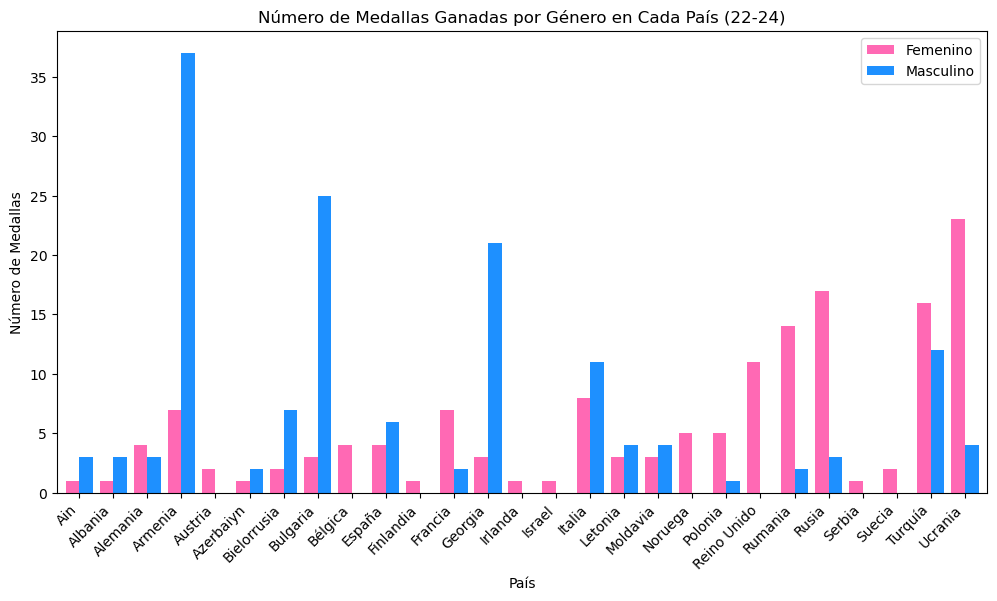

In [1144]:
# Graficar barras separadas para cada género
fig, ax = plt.subplots(figsize=(12, 6))
medallas_por_pais_2[["Femenino", "Masculino"]].plot(
    kind="bar", ax=ax, color=["#FF69B4", "#1E90FF"], width=0.8
)

# Etiquetas y título
plt.ylabel("Número de Medallas")
plt.xlabel("País")
plt.title("Número de Medallas Ganadas por Género en Cada País (22-24)")
plt.legend(["Femenino", "Masculino"])
plt.xticks(rotation=45, ha="right")

# Mostrar gráfico
plt.show()


In [1095]:
# Encontrar la menor diferencia de medallas
diferencia_minima = medallas_por_pais_2["Diferencia"].min()

# Filtrar los países con esa diferencia mínima
paises_mas_equitativos = medallas_por_pais_2[medallas_por_pais_2["Diferencia"] == diferencia_minima].index.tolist()

# Imprimir la cantidad de países y sus nombres
print(f"Número de países con mayor equidad: {len(paises_mas_equitativos)}")
print("Países con mayor equidad:", ", ".join(paises_mas_equitativos))


Número de países con mayor equidad: 8
Países con mayor equidad: Alemania, Azerbaiyn, Finlandia, Irlanda, Israel, Letonia, Moldavia, Serbia


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [1096]:
# Agrupar por País y Género y calcular el promedio de puntos totales
promedios_final = df_final.groupby(['Pais', 'Genero'])['Total'].mean().unstack()

# Calcular la diferencia absoluta entre masculino y femenino
promedios_final['Diferencia_final'] = abs(promedios_final['Masculino'] - promedios_final['Femenino'])

# Encontrar el país con la menor diferencia
pais_menor_diferencia_final = promedios_final['Diferencia_final'].idxmin()
diferencia_minima_final = promedios_final['Diferencia_final'].min()

print(f"El país con la menor diferencia es {pais_menor_diferencia_final} con una diferencia de {diferencia_minima_final:.2f} puntos.")


El país con la menor diferencia es Rumania con una diferencia de 36.79 puntos.


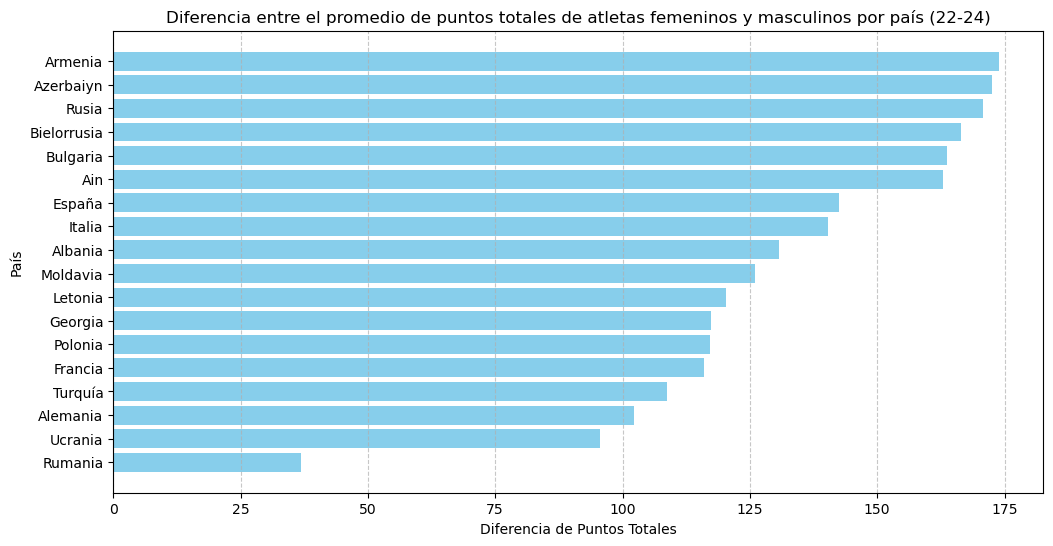

In [1146]:
# Eliminar valores NaN
promedios_final = promedios_final.dropna(subset=['Diferencia_final'])

# Ordenar los datos por diferencia
promedios_final = promedios_final.sort_values(by='Diferencia_final')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(promedios_final.index, promedios_final['Diferencia_final'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel("Diferencia de Puntos Totales")
plt.ylabel("País")
plt.title("Diferencia entre el promedio de puntos totales de atletas femeninos y masculinos por país (22-24)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


## **Preguntas propias**

### ¿Qué países tienen el mayor número de atletas en el podio?

In [1098]:
medallas_por_pais_final = df_final.groupby("Pais")["Nombre"].count().reset_index()

In [1099]:
medallas_por_pais_final

,Pais,Nombre
0,Ain,4
1,Albania,4
2,Alemania,7
3,Armenia,44
4,Austria,2
5,Azerbaiyn,3
6,Bielorrusia,9
7,Bulgaria,28
8,Bélgica,4
9,España,10


In [1100]:
medallas_por_pais_final.columns = ["Pais", "Total_Medallas"]

In [1101]:
medallas_por_pais_final.head(0)

,Pais,Total_Medallas


In [1102]:
medallas_por_pais_final = medallas_por_pais_final.sort_values(by="Total_Medallas", ascending=False)

In [1103]:
medallas_por_pais_final.head(5)

,Pais,Total_Medallas
3,Armenia,44
7,Bulgaria,28
25,Turquía,28
26,Ucrania,27
12,Georgia,24


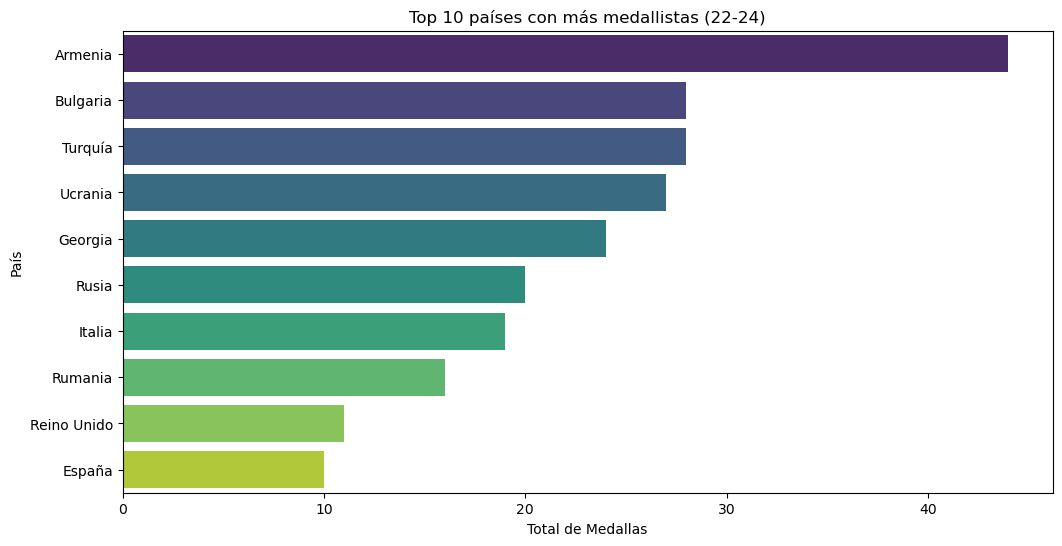

In [1145]:
plt.figure(figsize=(12, 6))
sns.barplot(data=medallas_por_pais_final.head(10), x="Total_Medallas", y="Pais", palette="viridis")
plt.xlabel("Total de Medallas")
plt.ylabel("País")
plt.title("Top 10 países con más medallistas (22-24)")
plt.show()

### ¿Cómo ha evolucionado el rendimiento de los países entre 2019 y 2024? (teniendo en cuenta que el año 2020 no se hizo)

In [1105]:
df_final["Año"] = df_final["Fecha"].dt.year

In [1106]:
medallas_por_pais_año_final = df_final.groupby(["Pais", "Año"])["Nombre"].count().unstack().fillna(0)

In [1107]:
medallas_por_pais_año_final.head()

Año,2019,2021,2022,2023,2024
Pais,,,,,
Ain,0.0,0.0,0.0,0.0,4.0
Albania,1.0,1.0,1.0,0.0,1.0
Alemania,2.0,0.0,2.0,0.0,3.0
Armenia,6.0,8.0,7.0,13.0,10.0
Austria,1.0,0.0,1.0,0.0,0.0


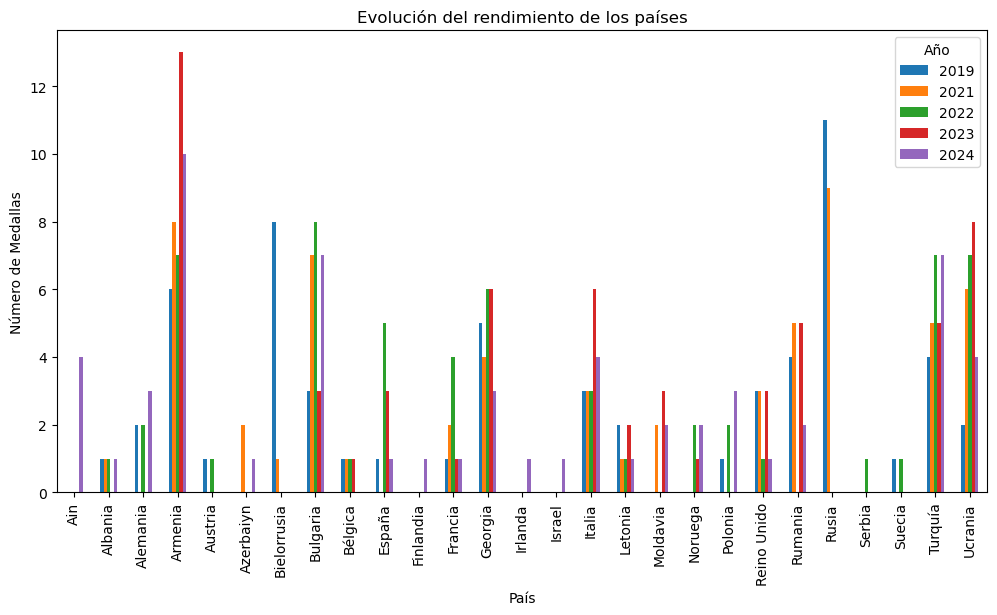

In [1148]:
medallas_por_pais_año_final.plot(kind="bar", figsize=(12, 6))
plt.xlabel("País")
plt.ylabel("Número de Medallas")
plt.title("Evolución del rendimiento de los países")
plt.xticks(rotation=90)
plt.legend(title="Año")
plt.show()

### ¿Cuáles son las categorías de peso más competitivas?

In [1109]:
df_final["Diferencia"] = df_final.groupby("Categoria")["Total"].transform(lambda x: x.max() - x.min())

In [1110]:
df_final["Diferencia"]

0      13
1      13
2      13
3      13
4      13
       ..
295    49
296    49
297    49
298    49
299    49
Name: Diferencia, Length: 300, dtype: int64

In [1111]:
competitividad_categoria_final = df_final.groupby("Categoria")["Diferencia"].mean().reset_index().sort_values(by="Diferencia")

In [1112]:
competitividad_categoria_final.head()

,Categoria,Diferencia
4,45,13.0
2,102,24.0
12,73,24.0
10,67,24.0
8,61,26.0


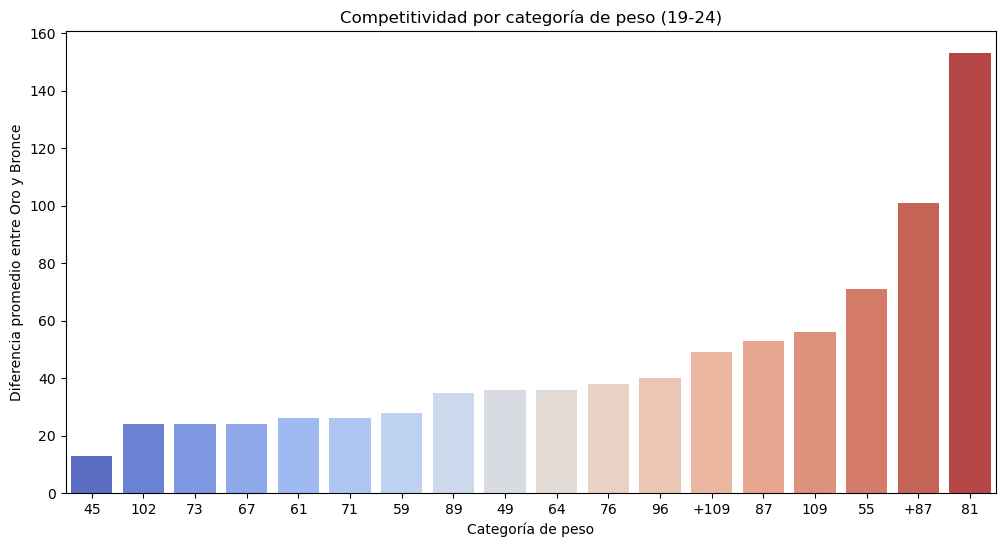

In [1150]:
plt.figure(figsize=(12, 6))
sns.barplot(data=competitividad_categoria_final, x="Categoria", y="Diferencia", palette="coolwarm")
plt.xlabel("Categoría de peso")
plt.ylabel("Diferencia promedio entre Oro y Bronce")
plt.title("Competitividad por categoría de peso (19-24)")
plt.xticks()
plt.show()

### ¿Existen países que destaquen en una modalidad específica (arrancada vs. dos tiempos)?

In [1114]:
rendimiento_pais_final = df_final.groupby("Pais")[["Arrancada", "Dos_tiempos"]].mean().reset_index()

In [1115]:
rendimiento_pais_final.head()

,Pais,Arrancada,Dos_tiempos
0,Ain,161.5,195.75
1,Albania,138.5,167.5
2,Alemania,123.571429,143.0
3,Armenia,164.204545,198.613636
4,Austria,102.0,128.5


In [1116]:
rendimiento_pais_final["Diferencia"] = abs(rendimiento_pais_final["Arrancada"] - rendimiento_pais_final["Dos_tiempos"])

In [1117]:
rendimiento_pais_final["Diferencia"].head()

0        34.25
1         29.0
2    19.428571
3    34.409091
4         26.5
Name: Diferencia, dtype: Float64

In [1118]:
rendimiento_pais_final = rendimiento_pais_final.sort_values(by="Diferencia", ascending=False)

In [1119]:
rendimiento_pais_final.head()

,Pais,Arrancada,Dos_tiempos,Diferencia
3,Armenia,164.204545,198.613636,34.409091
0,Ain,161.5,195.75,34.25
24,Suecia,97.5,131.0,33.5
7,Bulgaria,134.75,166.5,31.75
18,Noruega,104.4,136.0,31.6


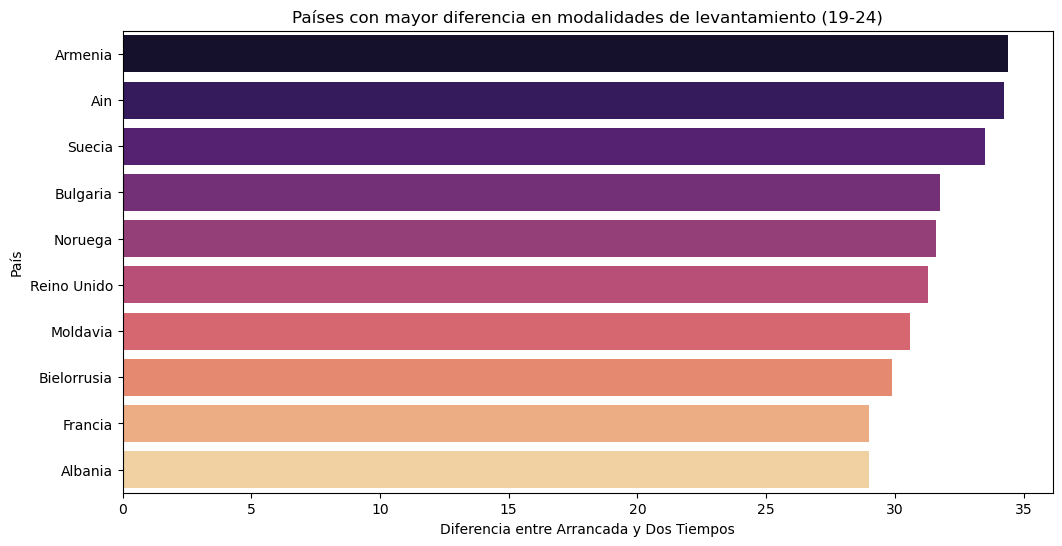

In [1151]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rendimiento_pais_final.head(10), x="Diferencia", y="Pais", palette="magma")
plt.xlabel("Diferencia entre Arrancada y Dos Tiempos")
plt.ylabel("País")
plt.title("Países con mayor diferencia en modalidades de levantamiento (19-24)")
plt.show()

### ¿Hay países donde un género destaca claramente sobre el otro?

In [1121]:
rendimiento_genero_pais_final = df_final.groupby(["Pais", "Genero"])["Total"].mean().unstack()

In [1122]:
rendimiento_genero_pais_final.head()

Genero,Femenino,Masculino
Pais,,
Ain,235.0,398.0
Albania,208.0,338.666667
Alemania,222.75,325.0
Armenia,216.571429,390.486486
Austria,230.5,<NA>


In [1123]:
rendimiento_genero_pais_final["Diferencia"] = abs(rendimiento_genero_pais_final["Femenino"] - rendimiento_genero_pais_final["Masculino"])

In [1124]:
rendimiento_genero_pais_final["Diferencia"].head()

Pais
Ain              163.0
Albania     130.666667
Alemania        102.25
Armenia     173.915058
Austria           <NA>
Name: Diferencia, dtype: Float64

In [1125]:
rendimiento_genero_pais_final = rendimiento_genero_pais_final.sort_values(by="Diferencia", ascending=False)

In [1126]:
rendimiento_genero_pais_final.head()

Genero,Femenino,Masculino,Diferencia
Pais,,,
Armenia,216.571429,390.486486,173.915058
Azerbaiyn,211.0,383.5,172.5
Rusia,225.647059,396.333333,170.686275
Bielorrusia,196.0,362.428571,166.428571
Bulgaria,155.0,318.8,163.8


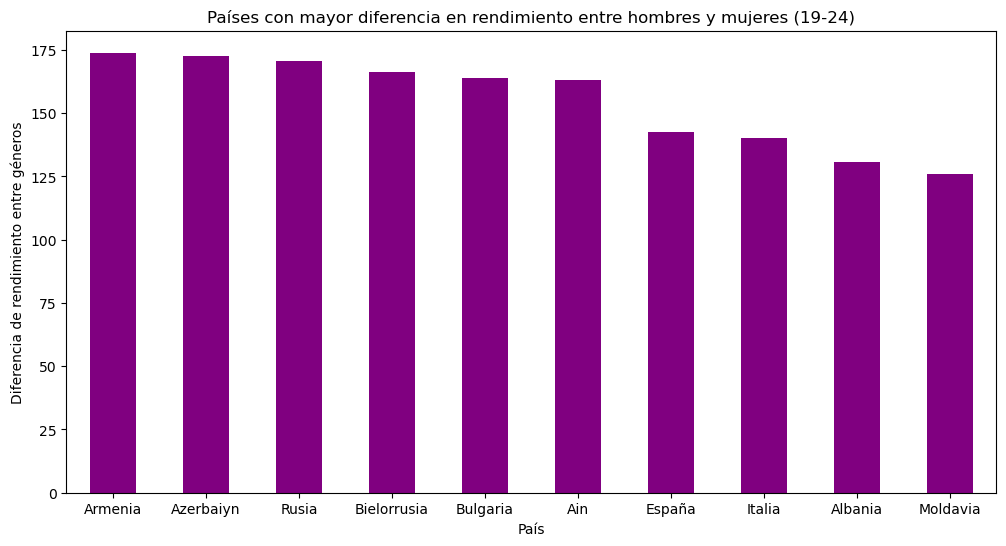

In [1152]:
plt.figure(figsize=(12, 6))
rendimiento_genero_pais_final["Diferencia"].head(10).plot(kind="bar", color="purple")
plt.xlabel("País")
plt.ylabel("Diferencia de rendimiento entre géneros")
plt.title("Países con mayor diferencia en rendimiento entre hombres y mujeres (19-24)")
plt.xticks(rotation=0)
plt.show()

### ¿El número total de atletas sube anualmente?

In [1128]:
df_final["Año"] = df_final["Fecha"].dt.year

In [1129]:
atletas_por_año_final = df_final.groupby("Año")["Nombre"].nunique().reset_index()
atletas_por_año_final.columns = ["Año", "Total_Atletas"]

In [1130]:
atletas_por_año_final

,Año,Total_Atletas
0,2019,54
1,2021,54
2,2022,58
3,2023,58
4,2024,59


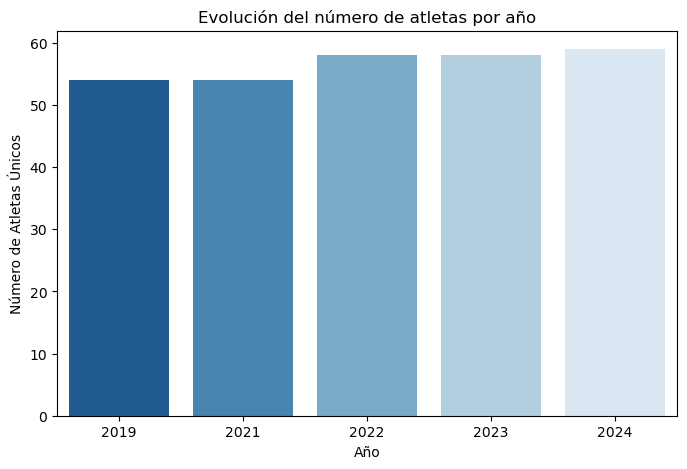

In [1131]:
plt.figure(figsize=(8, 5))
sns.barplot(data=atletas_por_año_final, x="Año", y="Total_Atletas", palette="Blues_r")
plt.xlabel("Año")
plt.ylabel("Número de Atletas Únicos")
plt.title("Evolución del número de atletas por año")
plt.show()

### ¿El número de atletas mujeres y hombres sigue siendo el mismo?

In [1132]:
df_final["Año"] = df_final["Fecha"].dt.year

In [1133]:
atletas_por_año_genero_final = df_final.groupby(["Año", "Genero"])["Nombre"].nunique().reset_index()
atletas_por_año_genero_final.columns = ["Año", "Genero", "Total_Atletas"]

In [1134]:
atletas_por_año_genero_final

,Año,Genero,Total_Atletas
0,2019,Femenino,26
1,2019,Masculino,28
2,2021,Femenino,26
3,2021,Masculino,28
4,2022,Femenino,28
5,2022,Masculino,30
6,2023,Femenino,28
7,2023,Masculino,30
8,2024,Femenino,29
9,2024,Masculino,30


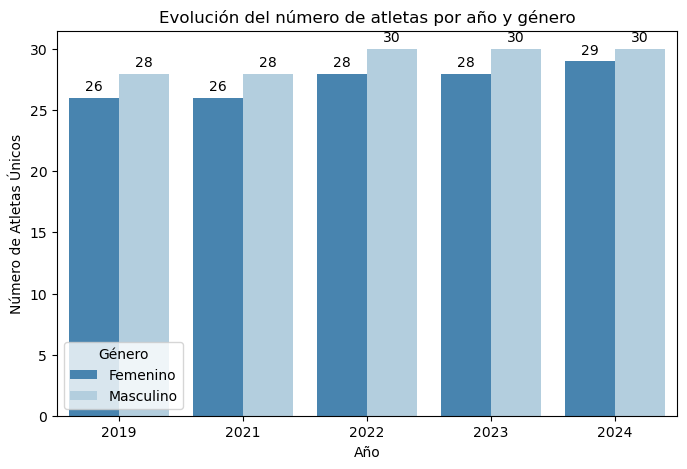

In [1135]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=atletas_por_año_genero_final, x="Año", y="Total_Atletas", hue="Genero", palette="Blues_r")

# Añadir etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, padding=3)

# Configurar etiquetas y título
plt.xlabel("Año")
plt.ylabel("Número de Atletas Únicos")
plt.title("Evolución del número de atletas por año y género")
plt.legend(title="Género")
plt.show()